<a href="https://colab.research.google.com/github/JMML2021/Entrega-projecte-final/blob/main/1.d%20Estudi%20fitxer%20amb%20codics%20Rev%20A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
#@title Importar llibrerias:

import numpy as np
import matplotlib as plt
import pandas as pd
import csv
import seaborn as sns
import datetime
from datetime import timedelta 


In [112]:
#@title obrir fitxer
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
path= '/content/drive/MyDrive/Ficheros de Vueling/2022.06.03 2022_delay + cierre puertas.xlsx'

In [114]:
# Abrir fichero de Github. 
Hoja = 'FLT_2022'

df = pd.read_excel(path, sheet_name=Hoja)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60492 entries, 0 to 60491
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   DATE                                                        56133 non-null  datetime64[ns]
 1   FLT                                                         56133 non-null  object        
 2   REG                                                         56133 non-null  object        
 3   AC                                                          56133 non-null  object        
 4   DEP                                                         56133 non-null  object        
 5   ARR                                                         56133 non-null  object        
 6   STD                                                         56133 non-null  object        
 7   STA                   

In [116]:
# Els noms de les columnes tenen molts espais en blanc

nombreColumnas= df.columns
nombreColumnas

Index(['DATE                             ', 'FLT    ', 'REG   ', 'AC ', 'DEP',
       'ARR', 'STD  ', 'STA  ', 'TKof ',
       'TDwn                                                      ', 'ATD  ',
       'ATA  ', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX  ', 'LF ',
       'Taxi-out', 'Taxi-In', 'SLOT       ', 'C1', 'DLY1 ', 'Sub1', 'C2',
       'DLY2 ', 'Sub2', 'C3', 'DLY3 ', 'Sub3', 'C4', 'DLY4 ', 'Sub4', 'C1Arr',
       'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2'],
      dtype='object')

In [117]:
# # Aqui corregeixo els noms de les columnes
nombreColumnaCorregido= ['DATE', 'FLT', 'REG', 'AC', 'DEP',
       'ARR', 'STD', 'STA', 'TKof', 'TDwn', 'ATD',
       'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2',
       'DLY2', 'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr',
       'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2']

In [118]:
#@title Procés per canviar el nom de les columnes amb un bucle FOR
for n, m in enumerate(nombreColumnas):
  print(n, m,'*',nombreColumnaCorregido[n],'-')
  df.rename({m: nombreColumnaCorregido[n]}, axis=1, inplace=True)

0 DATE                              * DATE -
1 FLT     * FLT -
2 REG    * REG -
3 AC  * AC -
4 DEP * DEP -
5 ARR * ARR -
6 STD   * STD -
7 STA   * STA -
8 TKof  * TKof -
9 TDwn                                                       * TDwn -
10 ATD   * ATD -
11 ATA   * ATA -
12 BLOCK * BLOCK -
13 FLThr * FLThr -
14 DStand * DStand -
15 AStand * AStand -
16 ACT PAX   * ACT PAX -
17 LF  * LF -
18 Taxi-out * Taxi-out -
19 Taxi-In * Taxi-In -
20 SLOT        * SLOT -
21 C1 * C1 -
22 DLY1  * DLY1 -
23 Sub1 * Sub1 -
24 C2 * C2 -
25 DLY2  * DLY2 -
26 Sub2 * Sub2 -
27 C3 * C3 -
28 DLY3  * DLY3 -
29 Sub3 * Sub3 -
30 C4 * C4 -
31 DLY4  * DLY4 -
32 Sub4 * Sub4 -
33 C1Arr * C1Arr -
34 DLY1Arr * DLY1Arr -
35 Close Pax Door * Close Pax Door -
36 Close Cargo Door * Close Cargo Door -
37 Open Cargo/Pax Door * Open Cargo/Pax Door -
38 close pax door2 * close pax door2 -
39 close cargo door2 * close cargo door2 -
40 open cargo/pax door2 * open cargo/pax door2 -


In [119]:
#@title Creo la seqüencia dels vols.

df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()
print(df[['Secuencia','STD', 'DEP']][0:4])

   Secuencia       STD  DEP
0        1.0  07:40:00  BIO
1        2.0  09:40:00  SVQ
2        3.0  11:40:00  BIO
3        4.0  13:30:00  SCQ


In [120]:
#@title Eliminar files amb valors Nan del df.

#df = df.dropna() 
df.head()

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Sub4,C1Arr,DLY1Arr,Close Pax Door,Close Cargo Door,Open Cargo/Pax Door,close pax door2,close cargo door2,open cargo/pax door2,Secuencia
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,07:40:00,09:05:00,08:10:00,09:17:00,...,,8,00:15:00,2022-01-01 07:58:00.000,2022-01-01 07:31:00.000,2022-01-01 09:23:00.000,07:58,07:31,09:23,1.0
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,09:40:00,11:05:00,10:03:00,11:07:00,...,,8,00:04:00,2022-01-01 09:48:00.000,2022-01-01 09:46:00.000,2022-01-01 11:11:00.000,09:48,09:46,11:11,2.0
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,11:40:00,12:50:00,11:50:00,12:40:00,...,,,NaN,2022-01-01 11:38:00.000,2022-01-01 11:34:00.000,2022-01-01 12:46:00.000,11:38,11:34,12:46,3.0
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,13:30:00,14:35:00,13:30:00,14:08:00,...,,,NaN,2022-01-01 13:18:00.000,2022-01-01 13:06:00.000,2022-01-01 14:12:00.000,13:18,13:06,14:12,4.0
4,2022-01-01,3262,EC-JSY,320,BIO,TFN,15:15:00,18:20:00,15:23:00,18:07:00,...,,,NaN,2022-01-01 15:07:00.000,2022-01-01 15:01:00.000,2022-01-01 18:14:00.000,15:07,15:01,18:14,5.0


In [121]:
#@ title Subrutina per convertir totes les columnes de temps en un format operatiu.

formato = "%H:%M:%S"

def convertirTiempo(clave):
    df[clave] = pd.to_datetime(df[clave],
                               format=formato,
                               errors='coerce')

columnasConvertir = ['DATE', 'STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr']              
               

for x in columnasConvertir:
    convertirTiempo(x)


In [122]:
#@title Subrutina que suma les dates amb les hores.

def adecuarFechas(fecha, tiempoClave):
    clave = "Date_" + tiempoClave
    print('.....Clave: ',clave, '....', fecha, tiempoClave)     
    df[tiempoClave] = pd.to_datetime(df[tiempoClave], format='%H:%M', errors='coerce')       
    
    df[tiempoClave] = pd.to_datetime( df[fecha].dt.strftime('%d/%m/%Y') + ' ' + df[tiempoClave].dt.strftime('%H:%M:%S'))

In [123]:
#@title Creo el df1 per treballar amb les columnes de data.
df1=df.copy()
#print(df['STD'].head())
columnasAddDate= ['STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr',
                  'close pax door2', 'close cargo door2']
 
for x in columnasAddDate:    
    adecuarFechas('DATE', x)


.....Clave:  Date_STD .... DATE STD
.....Clave:  Date_STA .... DATE STA
.....Clave:  Date_TKof .... DATE TKof
.....Clave:  Date_TDwn .... DATE TDwn
.....Clave:  Date_ATD .... DATE ATD
.....Clave:  Date_ATA .... DATE ATA
.....Clave:  Date_BLOCK .... DATE BLOCK
.....Clave:  Date_FLThr .... DATE FLThr
.....Clave:  Date_close pax door2 .... DATE close pax door2
.....Clave:  Date_close cargo door2 .... DATE close cargo door2


In [124]:
#@title Afegeixo el mes i setmana

df['MES'] = df['STD'].dt.month
df['Setmana'] = df['STD'].dt.week
df['DiaSetmana'] = df['STD'].dt.dayofweek
df['DiaSetmanaName'] = df['STD'].dt.day_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [125]:
#@title Identifico los Aeropuertos principales.

path =(r"/content/drive/MyDrive/Flights Movement 2019-2022 MAR.xlsx")
 
df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')
df_Aeropuertos = df_Aeropuertos.drop(['Borrar'], axis=1)

#df_Aeropuertos.head

In [126]:
AeropuertosCantidad = df['DEP']
AeropuertosCantidad['cantitat'] = df['DEP'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
#@title Sapigue quants vols han sortit de cada aeroport 

AeropuertosCantidad['cantitat'] = df['DEP'].value_counts()

AeropuertosCantidad['cantitat'].sort_values
AeropuertosCantidad=AeropuertosCantidad.sample(n=6, replace=True)
AeropuertosCantidad.columns=['Aeroport', 'cantitat']
AeropuertosCantidad.shape

(6,)

In [128]:
AeropuertosCantidad.head()

42886    IBZ
41028    PMI
17886    ALC
27457    FCO
55108    AGP
Name: DEP, dtype: object

In [129]:
#@title identifico els principals aeroports
df= pd.merge(df,df_Aeropuertos, left_on= 'DEP', right_on='Dep')

df= pd.merge(df,df_Aeropuertos, left_on= 'ARR', right_on='Dep')


df= df.rename({'AeropuertoKey1_x': 'Aeropuerto_Key', 'AeropuertoKey1_y': 'AeropuertoKey1'}, axis=1)

df= df.sort_values(['DATE', 'REG', 'STD'])
df= df.reset_index(drop=True)
borrarColumnas = ['Dep_x', 'Dep_y']
df = df.drop(borrarColumnas, axis=1)
df.head(4)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,close pax door2,close cargo door2,open cargo/pax door2,Secuencia,MES,Setmana,DiaSetmana,DiaSetmanaName,Aeropuerto_Key,AeropuertoKey1
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,2022-01-01 07:58:00,2022-01-01 07:31:00,09:23,1.0,1.0,52.0,5.0,Saturday,BIO,SVQ
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,2022-01-01 09:48:00,2022-01-01 09:46:00,11:11,2.0,1.0,52.0,5.0,Saturday,SVQ,BIO
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,2022-01-01 11:38:00,2022-01-01 11:34:00,12:46,3.0,1.0,52.0,5.0,Saturday,BIO,SCQ
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,2022-01-01 13:30:00,2022-01-01 14:35:00,2022-01-01 13:30:00,2022-01-01 14:08:00,...,2022-01-01 13:18:00,2022-01-01 13:06:00,14:12,4.0,1.0,52.0,5.0,Saturday,SCQ,BIO


In [130]:
#@title Estudi temps Close Pax i CLose Cargo door

df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
print(df['Close Pax Door'].head(4))
print('-----------------')
print(df1['ATD'].head(4))

0   2022-01-01 07:58:00
1   2022-01-01 09:48:00
2   2022-01-01 11:38:00
3   2022-01-01 13:18:00
Name: Close Pax Door, dtype: datetime64[ns]
-----------------
0   1900-01-01 08:00:00
1   1900-01-01 09:51:00
2   1900-01-01 11:40:00
3   1900-01-01 13:23:00
Name: ATD, dtype: datetime64[ns]


In [131]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df['t_ClosePax'] =   (df['Close Pax Door'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['t_ClosePax']

0         -2.0
1         -3.0
2         -2.0
3         -5.0
4          0.0
         ...  
56128    417.0
56129    474.0
56130    479.0
56131   -440.0
56132   -406.0
Name: t_ClosePax, Length: 56133, dtype: float64

In [132]:
#@title Càlcul del temps del boarding
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])
df['t_Close_Cargo_Door'] = (df ['Close Cargo Door'] - df['ATD']) /  np.timedelta64(1, 'm') 

df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])

df['Open Cargo/Pax Door'] =pd.to_datetime(df['Open Cargo/Pax Door'])

df['t_Entre_Puertas'] = (df ['Close Cargo Door'] - df['Close Pax Door']) /  np.timedelta64(1, 'm') 
df['Retardo_Abrir_Puerta_Pax']= df['Open Cargo/Pax Door']-df['ATA']
df[['Retardo_Abrir_Puerta_Pax', 'Open Cargo/Pax Door','ATA']]

,Retardo_Abrir_Puerta_Pax,Open Cargo/Pax Door,ATA
0,0 days 00:03:00,2022-01-01 09:23:00,2022-01-01 09:20:00
1,0 days 00:02:00,2022-01-01 11:11:00,2022-01-01 11:09:00
2,0 days 00:01:00,2022-01-01 12:46:00,2022-01-01 12:45:00
3,0 days 00:01:00,2022-01-01 14:12:00,2022-01-01 14:11:00
4,0 days 00:00:00,2022-01-01 18:14:00,2022-01-01 18:14:00
...,...,...,...
56128,0 days 07:56:00,2022-05-16 15:33:00,2022-05-16 07:37:00
56129,0 days 07:59:00,2022-05-16 18:01:00,2022-05-16 10:02:00
56130,0 days 08:36:00,2022-05-16 20:31:00,2022-05-16 11:55:00
56131,-1 days +17:16:00,2022-05-16 09:34:00,2022-05-16 16:18:00


In [133]:
#@title Estudio els trajectes.
condicion = [(df['DEP'] < df['ARR']),  (df['ARR'] < df['DEP'])]

valores = [  (df['DEP'] + '-' + df['ARR']),  (df['ARR'] + '-' + df['DEP'])]

df['Trayecto'] = np.select(condicion, valores ) 
df['Trayecto'].head(4)

#df5 = df.where('Departure' > 'Arrival',  'Departure' + 'Arrival',  'Arrival' +'Departure')

0    BIO-SVQ
1    BIO-SVQ
2    BIO-SCQ
3    BIO-SCQ
Name: Trayecto, dtype: object

In [134]:
# Crec la seqüència de vols de cada avió cada dia

df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()

df1=df
df1.head(2)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Setmana,DiaSetmana,DiaSetmanaName,Aeropuerto_Key,AeropuertoKey1,t_ClosePax,t_Close_Cargo_Door,t_Entre_Puertas,Retardo_Abrir_Puerta_Pax,Trayecto
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,52.0,5.0,Saturday,BIO,SVQ,-2.0,-29.0,-27.0,0 days 00:03:00,BIO-SVQ
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,52.0,5.0,Saturday,SVQ,BIO,-3.0,-5.0,-2.0,0 days 00:02:00,BIO-SVQ


In [135]:
#@title Subrutina: graficà el retard en l'enlairament:
def dibujarScatter( ejeX, ejeY):
    x= df1[ejeX]
    y = df1[ejeY]    
    ax = sns.scatterplot(x , y )



¿


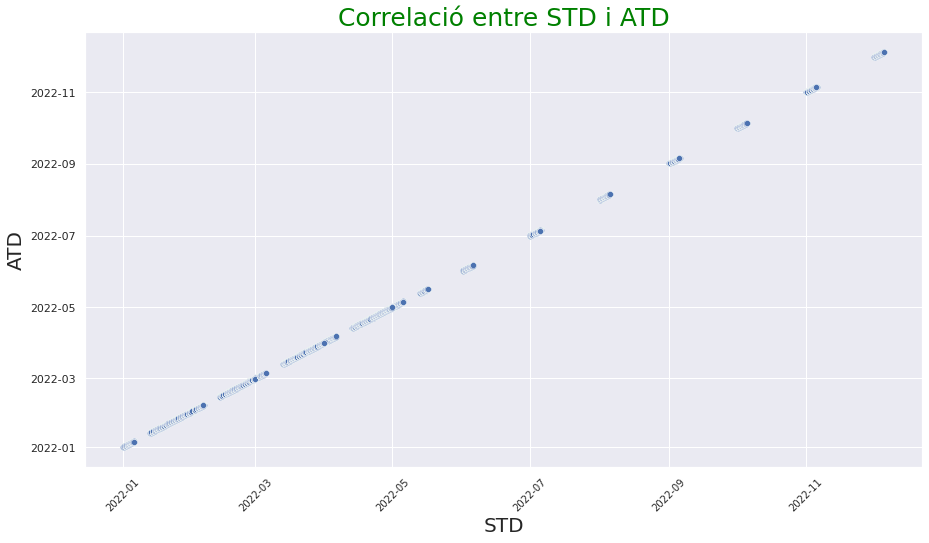

In [136]:
 #@title : Puntualitat mitjana primer enlairament el 2022
 #

import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
ax = sns.scatterplot( x=df1['STD'], y=df1['ATD'])
ax.set_title('Correlació entre STD i ATD', fontsize=25, color='green')
ax.set_xlabel("STD", fontsize = 20)
ax.set_ylabel("ATD", fontsize = 20)

plt.xticks(rotation=45,  fontsize=10)
print('¿')

# Calculo error del primer despegue.

In [137]:
# Filtro primer despegue

vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]
print(df2[['DATE','REG', 'Secuencia','STD']][0:8])


         DATE     REG  Secuencia                 STD
0  2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00
6  2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00
12 2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00
16 2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00
21 2022-01-01  EC-KDX        1.0 2022-01-01 17:35:00
24 2022-01-01  EC-KLB        1.0 2022-01-01 05:25:00
29 2022-01-01  EC-KLT        1.0 2022-01-01 07:30:00
33 2022-01-01  EC-KMI        1.0 2022-01-01 12:05:00


In [138]:
#Calculo error primer despegue despegue:

df1['E_Despegue'] = (df1['ATD']- df1['STD']) /  np.timedelta64(1, 'm')

 
df1['E_Despegue'].head()
 

#print(df1['E_Despegue'][0], '-----', df1['Date_ATD'][0], '........', df1['Date_STD'][0])
#print(df1[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])

print(df1[['DATE','REG', 'Secuencia','STD', 'ATD','E_Despegue']][0:8])

print('\nMedia = ', df1['E_Despegue'].mean())

        DATE     REG  Secuencia                 STD                 ATD  \
0 2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00   
1 2022-01-01  EC-JSY        2.0 2022-01-01 09:40:00 2022-01-01 09:51:00   
2 2022-01-01  EC-JSY        3.0 2022-01-01 11:40:00 2022-01-01 11:40:00   
3 2022-01-01  EC-JSY        4.0 2022-01-01 13:30:00 2022-01-01 13:23:00   
4 2022-01-01  EC-JSY        5.0 2022-01-01 15:15:00 2022-01-01 15:07:00   
5 2022-01-01  EC-JSY        6.0 2022-01-01 18:55:00 2022-01-01 18:51:00   
6 2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00 2022-01-01 07:12:00   
7 2022-01-01  EC-JZI        2.0 2022-01-01 09:40:00 2022-01-01 09:23:00   

   E_Despegue  
0        20.0  
1        11.0  
2         0.0  
3        -7.0  
4        -8.0  
5        -4.0  
6       -18.0  
7       -17.0  

Media =  1.040119717808024


Text(0.5, 0, 'Error (minuts)')

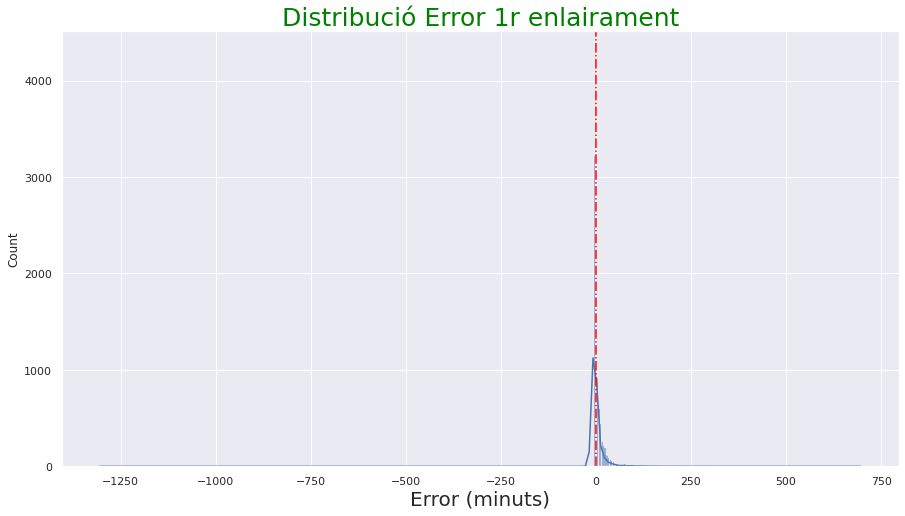

In [139]:
plt.figure(figsize = (15,8))
p= sns.histplot(data= df1.E_Despegue, kde= True)
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
p.set_title('Distribució Error 1r enlairament', fontsize=25, color='green')
p.set_xlabel("Error (minuts)", fontsize = 20)

Del gràfic veiem que clarament no és normal i que té moltes dades que no són normals. És una corba, clarament no gaussiana, descentrada capa la dreta.

¿Per què tenim aquest outliers?.

 Les raons són situacions extraordinàries, totalment aleatòries, i que requereixen una anàlisi per si mateix, però que amb les dades que tinc no em permet estudiar. Per exemple pot ser motiu d'una avaria d'un motor, una vaga, un passatger que ha perdut el vol i que no es documenta correctament el motiu del retard.

 
**Acció** Eliminarem totes les dades que són o més grans o més petites de 30 minuts. 

30 minuts el considerem un temps prudencial molt gran i que ha provocat un canvi de SLOT per part del Controlador Aeri

# Hi ha molta dispersió i hem de filtrar les dades a:
## error de sortida > 30 i < 30 i és el 1r enlairament


Mitjana filtrada =  -2.2 minuts


Text(0.5, 0, 'Error (minuts)')

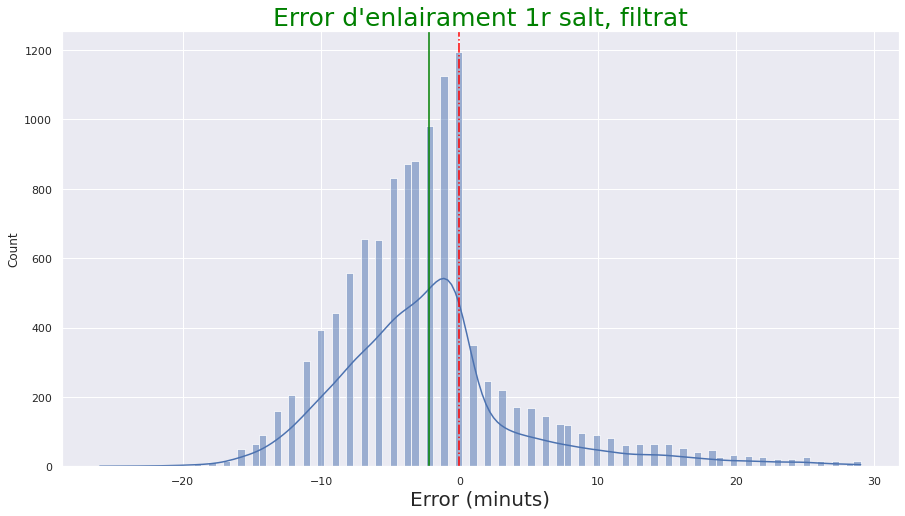

In [140]:
# Eliminar los outliers
df2=df.copy()
dfEliminarOutliers= ((df2['Secuencia']== 1) & (df2['E_Despegue']< 30) & (df2['E_Despegue']> -30))

df2 = df[dfEliminarOutliers]
#
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Despegue, kde= True)
p.set_title("Error d'enlairament 1r salt, filtrat", fontsize=25, color='green')
mediaFiltrada = round(df2['E_Despegue'].mean(),2)
p.axvline(mediaFiltrada, 0,12, color = 'green')                       # Media real
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
print()
print('Mitjana filtrada = ', mediaFiltrada, 'minuts')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 
p.set_xlabel("Error (minuts)", fontsize = 20)

Puntualidad BCN en el 1r enlairament: -1.81


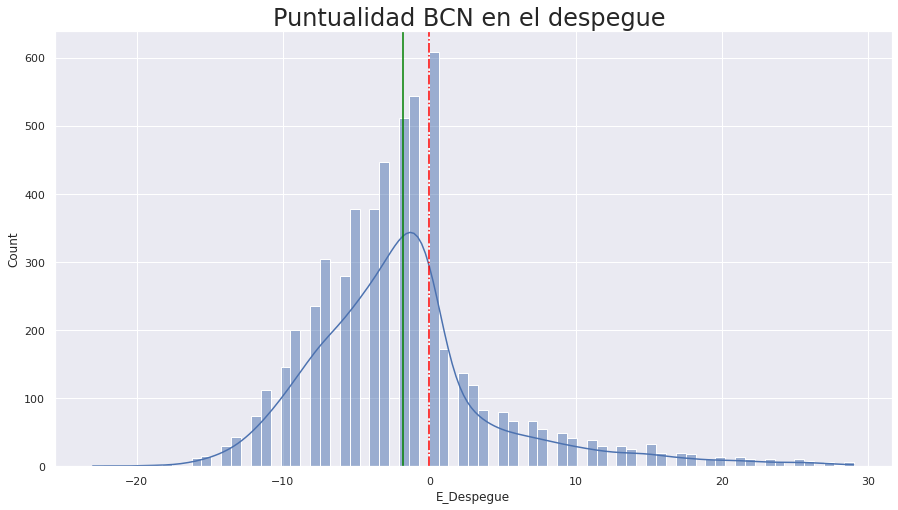

In [141]:
# Per saber la puntualitat només de Barcelona
df2barcelonaPuntualida = (df2['DEP']== 'BCN')


df2BarcelonaPuntualida = df2[df2barcelonaPuntualida]
df2barcelonaPuntualida.head()

plt.figure(figsize = (15,8)) 
puntualidadBCN = round((df2BarcelonaPuntualida['E_Despegue'].mean()),2)#
print('Puntualidad BCN en el 1r enlairament:' , puntualidadBCN ) 

p=sns.histplot(data= df2BarcelonaPuntualida.E_Despegue, kde= True).set_title('Puntualidad BCN en el despegue ', fontsize = 24)


#Linea d'objectius 
plt.axvline(puntualidadBCN, 0,12, color = 'green')                       # Media real
plt.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo 
 

Text(0.5, 1.0, 'Puntualitat principals aeroports a l1 Enlairament:')

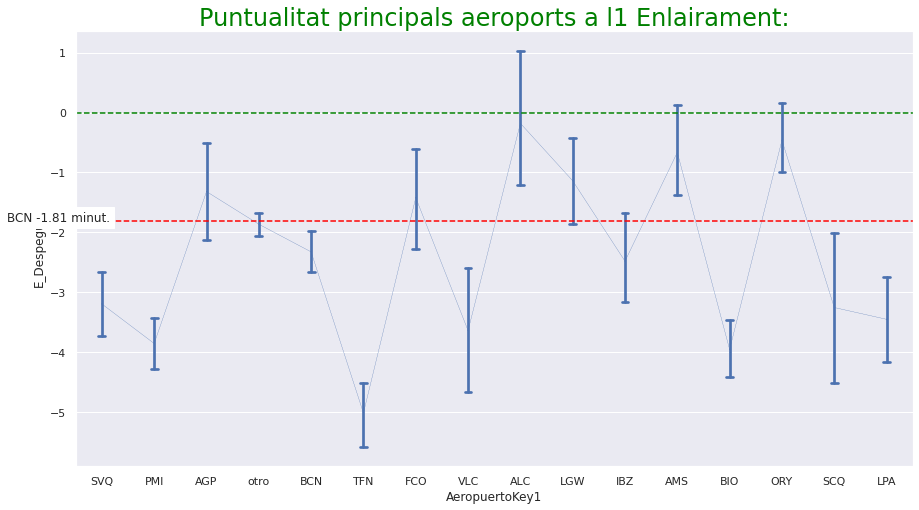

In [142]:
#@title Intervals de confiança per aeroport.

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_Despegue", data= df2, scale=.1, kind = "point", capsize=0.13)

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat principals aeroports a l1 Enlairament:', fontsize = 24, color= 'green')


Media filtrada =  9.04 minutos
N=  71334
vegadas s'ha tanca >0 minuts:  816
Count of values greater than 20 in Column F :  693
 El porcentatge es de: 0.97


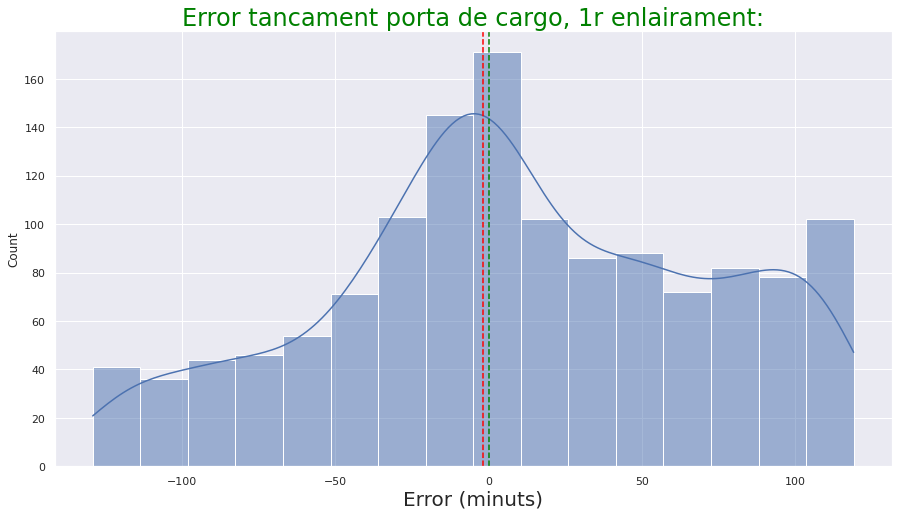

In [143]:
#@title t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_Close_Cargo_Door']< 120) & (df1['t_Close_Cargo_Door']> -130))

df2 = df[dfEliminarOutliers]
#df2 = df2[dfEliminarOutliers]


ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df2['t_Close_Cargo_Door'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Error tancament porta de cargo, 1r enlairament:', fontsize = 24, color= 'green')
ax.set_xlabel("Error (minuts)", fontsize = 20)
tamañoDF = df2.size
print('N= ', tamañoDF)
cantidadCierresCargo= df2[df2['t_Close_Cargo_Door'] > -10].count() # Cantitat de vegadas la porta de carga es tanca > 0
 
print("vegadas s'ha tanca >0 minuts: ",str(cantidadCierresCargo['DATE']))

countMalos = np.count_nonzero(df2['t_Close_Cargo_Door'] > 0)
print('Count of values greater than 20 in Column F : ', countMalos)

porcentaje = round(countMalos/tamañoDF*100,2)

print(' El porcentatge es de:', porcentaje)

# tiempo  'tiempo Close Pax'  -   'ATD'


Media filtrada =  -1.5 minutos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 1.0, 'Error tancament porta Pax, 1r enlairament:')

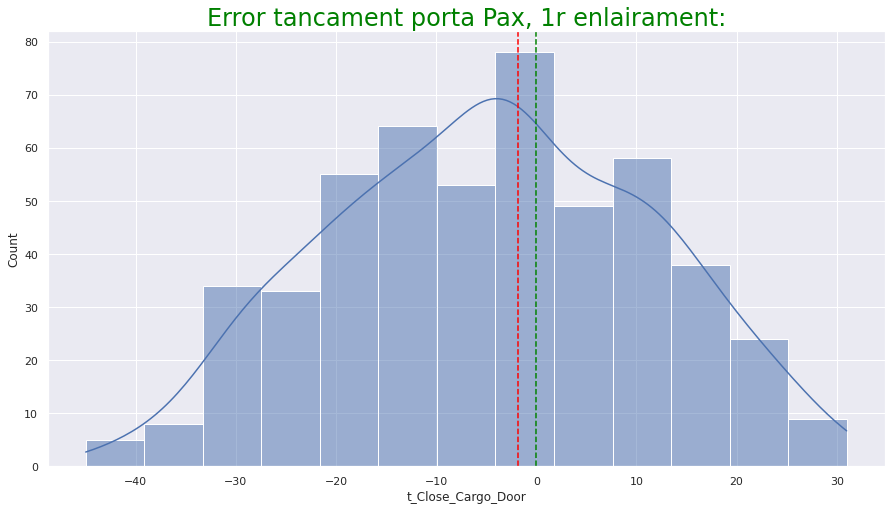

In [144]:
#@title Texto de título predeterminado
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_ClosePax']< 30) & (df1['t_ClosePax']> -30))

df2 = df2[dfEliminarOutliers] 

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df2['t_ClosePax'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Error tancament porta Pax, 1r enlairament:', fontsize = 24, color= 'green')

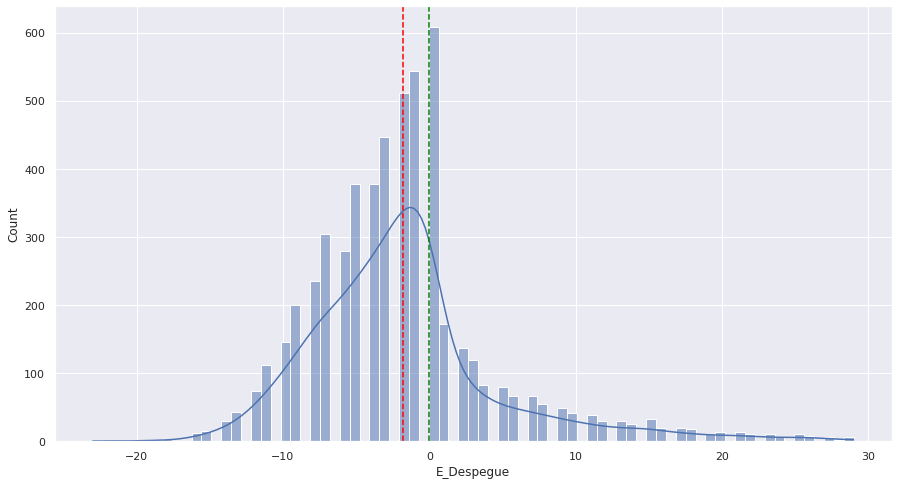

In [145]:
ax=sns.histplot(data= df2BarcelonaPuntualida.E_Despegue, kde= True)

ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# creamos los LAGs

In [146]:
#@title Creem els LAGs

df= df.sort_values(['DATE', 'REG', 'STD'])


df[f'lag_STD']= df['STD'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATD']= df['ATD'].shift(periods=-1)  

df[f'lag_STA']= df['STA'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATA']= df['ATA'].shift(periods=-1) 

#adecuarFechas('Pasajeros', 'ACT PAX  ')
df[f'lag_ACT PAX']= df['ACT PAX'].shift(periods=-1) 

#Lag de la siguiente secuencia
df[f'lag_Secuencia']= df['Secuencia'].shift(periods=-1) 
df[f'lag_REG']= df['REG'].shift(periods=-1) 

df[['lag_Secuencia', 'lag_REG']]

,lag_Secuencia,lag_REG
0,2.0,EC-JSY
1,3.0,EC-JSY
2,4.0,EC-JSY
3,5.0,EC-JSY
4,6.0,EC-JSY
...,...,...
56128,3.0,EC-NLY
56129,4.0,EC-NLY
56130,5.0,EC-NLY
56131,6.0,EC-NLY


# Tiempo en tierra de una avion despues primer salto
##df3 --> Calculo tiempo en tierra

In [147]:
#@title E. Enlairament primer salt del matí
df= df.sort_values(['DATE', 'REG', 'STD'])



df['T_teoricoTierra1'] = (df['lag_STD']- df['STA']) /  np.timedelta64(1, 'm')
df['T_RealTierra1'] = (df['lag_ATD']- df['ATA']) /  np.timedelta64(1, 'm')

df['E_tierra1'] = df['T_RealTierra1'] -df['T_teoricoTierra1']

df3=df

print(df3[['FLT', 'Secuencia','STD', 'ATD', 'lag_STD', 'T_teoricoTierra1', 'E_tierra1']][0:4])
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')


    FLT  Secuencia                 STD                 ATD  \
0  2506        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00   
1  2505        2.0 2022-01-01 09:40:00 2022-01-01 09:51:00   
2  1386        3.0 2022-01-01 11:40:00 2022-01-01 11:40:00   
3  1387        4.0 2022-01-01 13:30:00 2022-01-01 13:23:00   

              lag_STD  T_teoricoTierra1  E_tierra1  
0 2022-01-01 09:40:00              35.0       -4.0  
1 2022-01-01 11:40:00              35.0       -4.0  
2 2022-01-01 13:30:00              40.0       -2.0  
3 2022-01-01 15:15:00              40.0       16.0  

Media filtrada =  5.51 minutos


In [148]:
# Retraso
df['Puntualidad1'] = (df['ATA'] - df['STA']) /  np.timedelta64(1, 'm') 
df['Puntualidad1'].head(3)

0    15.0
1     4.0
2    -5.0
Name: Puntualidad1, dtype: float64

# Calculo Tiempo de carga y descarga de pasajeros:
Cojo solo las segundas secuencias que tengan el siguiente vuelo el mismo REG

In [149]:
# Total pasajeros Boarding

df['Total_PAX_Boarding'] = df['lag_ACT PAX'] +df['ACT PAX']

df['Total_PAX_Boarding'] 

df['T_Medio_Boarding'] = round(df['Total_PAX_Boarding'] / df['T_RealTierra1'],1)
df[['T_Medio_Boarding', 'Total_PAX_Boarding', 'T_RealTierra1']]
#df['T_Medio_Boarding']

,T_Medio_Boarding,Total_PAX_Boarding,T_RealTierra1
0,6.6,206.0,31.0
1,4.4,135.0,31.0
2,2.1,78.0,38.0
3,3.6,202.0,56.0
4,7.5,276.0,37.0
...,...,...,...
56128,8.5,407.0,48.0
56129,9.2,367.0,40.0
56130,2.9,329.0,115.0
56131,8.6,345.0,40.0


In [150]:
# Calcul dels temps de Taxi.

df['Taxi_Despegue'] = (df['TKof']-df['ATD']) /  np.timedelta64(1, 'm')
df['Taxi_Aterrizaje'] = (df['ATA']- df['TDwn']) /  np.timedelta64(1, 'm')
df[['Taxi_Despegue', 'Taxi_Aterrizaje']]

,Taxi_Despegue,Taxi_Aterrizaje
0,10.0,3.0
1,12.0,2.0
2,10.0,5.0
3,7.0,3.0
4,16.0,7.0
...,...,...
56128,10.0,4.0
56129,24.0,5.0
56130,7.0,4.0
56131,24.0,7.0


# Tiempo de rodadura (En el despegue y en el aterrizaje

In [151]:
#@title Càlcul temps de vol teòric Real i error
df['DuracionVueloTeorico']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'] = (df['DuracionVueloReal'] - df['DuracionVueloTeorico']) #/  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'].head(3)

media = round(df['E_Duracion_Vuelo'].mean(),2)

print('\n\nError medio en tiempo de vuelo',media)



Error medio en tiempo de vuelo -5.51


In [152]:
#Creamos los LAGs

df[f'E_Despegue2']= df['E_Despegue'].shift(periods=-1) 
df[f'E_Despegue3']= df['E_Despegue'].shift(periods=-2) 
df[f'E_Despegue4']= df['E_Despegue'].shift(periods=-3) 

df[f'E_Duracion_Vuelo2']= df['E_Duracion_Vuelo'].shift(periods=-1) 
df[f'E_Duracion_Vuelo3']= df['E_Duracion_Vuelo'].shift(periods=-2) 
df[f'E_Duracion_Vuelo4']= df['E_Duracion_Vuelo'].shift(periods=-3) 

df[f'E_tierra2']= df['E_tierra1'].shift(periods=-1) 
df[f'E_tierra3']= df['E_tierra1'].shift(periods=-2) 
df[f'E_tierra4']= df['E_tierra1'].shift(periods=-3) 

df[f'Aeropuerto_Key2']= df['Aeropuerto_Key'].shift(periods=-1) 
df[f'Aeropuerto_Key3']= df['Aeropuerto_Key'].shift(periods=-2) 
df[f'Aeropuerto_Key4']= df['Aeropuerto_Key'].shift(periods=-3) 

df[f'Puntualidad2']= df['Puntualidad1'].shift(periods=-1) 
df[f'Puntualidad3']= df['Puntualidad1'].shift(periods=-2) 
df[f'Puntualidad4']= df['Puntualidad1'].shift(periods=-3) 

df[f'E_Despegue_Total'] = df[f'E_Despegue'] + df[f'E_Despegue2'] + df[f'E_Despegue3'] + df[f'E_Despegue4']
df[f'E_Duracion_Vuelo_Total'] = df[f'E_Duracion_Vuelo'] + df[f'E_Duracion_Vuelo2'] + df[f'E_Duracion_Vuelo3']   + df[f'E_Duracion_Vuelo4'] 
df[f'E_tierra_Total'] = df[f'E_tierra1'] + df[f'E_tierra2'] + df[f'E_tierra3']    + df[f'E_tierra4']

df['E_acumulado_Total'] = df[f'E_Despegue_Total'] + df[f'E_Duracion_Vuelo_Total'] + df[f'E_tierra_Total'] 


In [153]:
df.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Setmana', 'DiaSetmana', 'DiaSetmanaName',
       'Aeropuerto_Key', 'AeropuertoKey1', 't_ClosePax', 't_Close_Cargo_Door',
       't_Entre_Puertas', 'Retardo_Abrir_Puerta_Pax', 'Trayecto', 'E_Despegue',
       'lag_STD', 'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX',
       'lag_Secuencia', 'lag_REG', 'T_teoricoTierra1', 'T_RealTierra1',
       'E_tierra1', 'Puntualidad1', 'Total_PAX_Boarding', 'T_Medio_Boarding',
       'Taxi_Despegue', 'Taxi_Aterrizaje', 'DuracionVueloTeorico',
       'DuracionVueloReal', 'E_Duracion_V

[Text(0.5, 1.0, 'Error en Tierra .... con outliers:')]

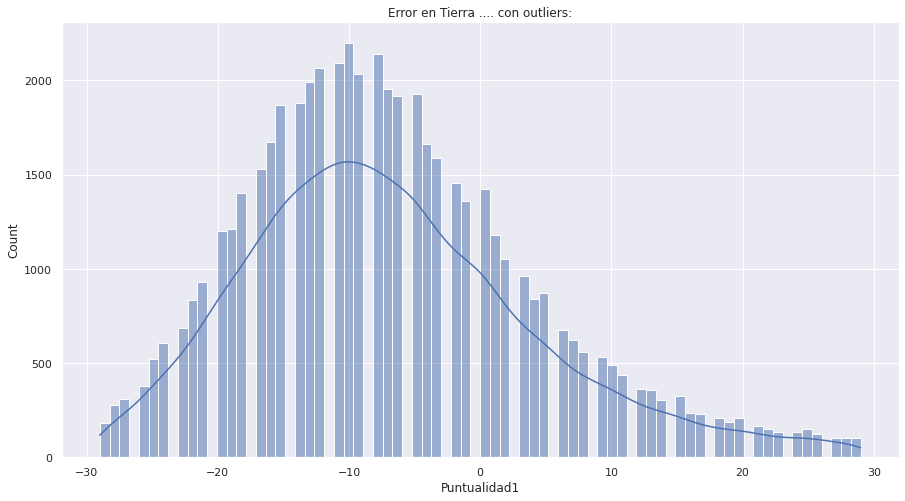

In [154]:
#@title retard 3r salt BORRARRRRRR:
dfEliminarOutliers= ( (df['Puntualidad1']< 30) & (df['Puntualidad1']> -30))

df9 = df[dfEliminarOutliers]
#df9=df.copy()

sns.histplot(data= df9.Puntualidad1, kde= True).set(title='Error en Tierra .... con outliers:')

# Estudio en Tierra primer aterrizaje.

[Text(0.5, 1.0, 'Error en Tierra .... con outliers:')]

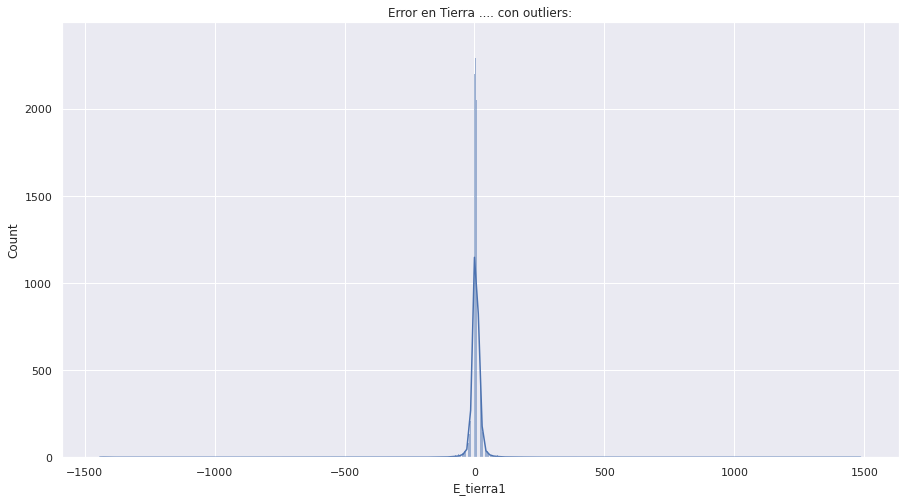

In [155]:
sns.histplot(data= df3.E_tierra1, kde= True).set(title='Error en Tierra .... con outliers:')
 

És clar que hi ha **molts de outiers** i igual que hem fet al primer enlairament, hem de fer als altres moviments de l'avió.


Media filtrada =  4.63 minutos


Text(4.63, 4.63, 'BCN -1.81 minut.')

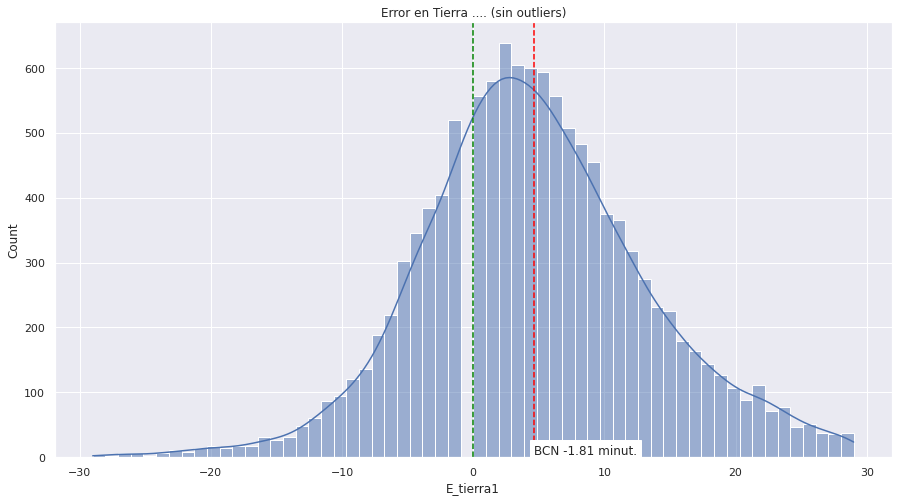

In [156]:
# Eliminar los outliers

#df2=df1
dfEliminarOutliers= ((df3['Secuencia']== 1) & (df3['E_tierra1']< 30) & (df3['E_tierra1']> -30))

df3 = df3[dfEliminarOutliers]
ax = sns.histplot(data= df3.E_tierra1, kde= True)
ax.set_title("Error en Tierra .... (sin outliers)")
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')

media = round(df3['E_tierra1'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


#textoBCN = "Media "+ str(media) + ' minut.'
ax.text(media  ,media, textoBCN, backgroundcolor='w') 


In [157]:
def porcentajeErrorPPM (df5, accion):
  PPM_0=df5.apply(lambda x: x['E_tierra1'] > 0, axis=1).sum()
  
  #print(df3.shape)
  #print(PPM)

  PorcentajeError_0=round(PPM_0/df3.shape[0]*100,2)
  print("Cantitat d'avions que ", accion," drespre´s de 0 minuts: ", PorcentajeError_0,'%')
  PPM_10=df5.apply(lambda x: x['E_tierra1'] > 10, axis=1).sum()
  PorcentajeError_10=round(PPM_10/df3.shape[0]*100,2)
  print("Cantitat d'avions que ", accion," drespre´s de 10 minuts: ", PorcentajeError_10,'%')


print(porcentajeErrorPPM( df3, 'arriven'))

Cantitat d'avions que  arriven  drespre´s de 0 minuts:  68.73 %
Cantitat d'avions que  arriven  drespre´s de 10 minuts:  22.92 %
None


In [158]:
# Crear Subgrupos de tiempo de boarding:
'''
df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000,0, 41, 46,51,60,100000], labels=['NEGATIVOS',
                                                                                              '1.- >0 & <=41',
                                                                                              '2.- >42 & <=46',
                                                                                              '3.- >47 & <51',
                                                                                              '4.- >52 & <60',
                                                                                              '5.- >61'])
'''

df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000, 0, 39, 40, 45, 50, 55, 60, 100000], labels=['NEGATIVOS',
                                                                                                          
                                                                                                          '1.- <40',
                                                                                                          '2.- 40',
                                                                                                          '3.- 45',
                                                                                                          '4.- 50',
                                                                                                          '5.- 55',
                                                                                                          '6.- 60', 
                                                                                                          '7.- >60'])
df3[['T_teoricoTierra1', 't_boarding']].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,T_teoricoTierra1,t_boarding
0,35.0,1.- <40
6,40.0,2.- 40
12,40.0,2.- 40
16,35.0,1.- <40
21,55.0,5.- 55


In [159]:
# Para saber error primer boarding solo de Barcelona

barcelonaTierra = (df3['ARR']== 'BCN')

df4BarcelonaTierra = df3[barcelonaTierra]
df4BarcelonaTierra .head()
df4BarcelonaTierraError  = round((df4BarcelonaTierra ['E_tierra1'].mean()),2)
print('\nError en el aterrizaje de Barcelona ', df4BarcelonaTierraError, 'minuts de mitjana')


Error en el aterrizaje de Barcelona  3.24 minuts de mitjana


Text(0.5, 1.0, 'Error primer t. BOARDING principales aeropuertos:')

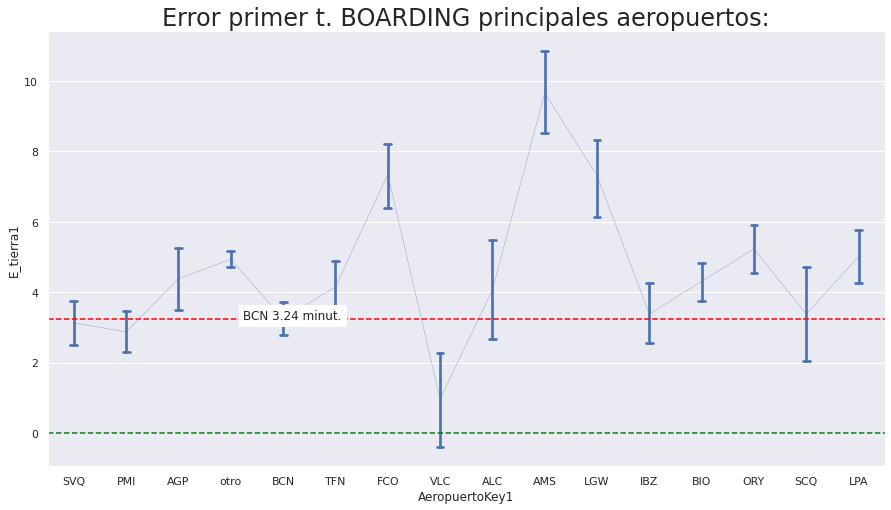

In [160]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_tierra1", data= df3, scale=.1, kind = "point", capsize=0.13)

ax.axhline(df4BarcelonaTierraError , color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error primer t. BOARDING principales aeropuertos:', fontsize = 24)

In [161]:
df4BarcelonaTierra .head()

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Aeropuerto_Key3,Aeropuerto_Key4,Puntualidad2,Puntualidad3,Puntualidad4,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,t_boarding
21,2022-01-01,3909,EC-KDX,320,PMI,BCN,2022-01-01 17:35:00,2022-01-01 18:30:00,2022-01-01 17:45:00,2022-01-01 18:22:00,...,otro,BCN,-9.0,-6.0,-14.0,-23.0,-5.0,0.0,-28.0,5.- 55
42,2022-01-01,2114,EC-LLM,320,AGP,BCN,2022-01-01 07:40:00,2022-01-01 09:15:00,2022-01-01 07:55:00,2022-01-01 09:09:00,...,SVQ,BCN,-11.0,-21.0,-11.0,-20.0,-26.0,19.0,-27.0,3.- 45
237,2022-01-01,8031,EC-MMH,321,ORY,BCN,2022-01-01 08:35:00,2022-01-01 10:15:00,2022-01-01 09:02:00,2022-01-01 10:15:00,...,otro,BCN,-6.0,-11.0,-27.0,10.0,-50.0,23.0,-17.0,2.- 40
246,2022-01-01,2110,EC-MNZ,32A,AGP,BCN,2022-01-01 05:50:00,2022-01-01 07:25:00,2022-01-01 05:52:00,2022-01-01 07:00:00,...,otro,BCN,-25.0,0.0,-4.0,-7.0,-43.0,48.0,-2.0,7.- >60
290,2022-01-01,1429,EC-MXG,32A,BIO,BCN,2022-01-01 13:50:00,2022-01-01 15:00:00,2022-01-01 13:55:00,2022-01-01 14:41:00,...,IBZ,BCN,-3.0,-6.0,-12.0,-25.0,-10.0,11.0,-24.0,4.- 50


In [162]:
# Contabilizar elementos por grupo de boarding
df5= df3['t_boarding'].value_counts()
#df5['t_boarding']= df5.sort_values('t_boarding')
df5.head()
df5

2.- 40       3373
1.- <40      3249
3.- 45       3012
4.- 50        833
7.- >60       706
NEGATIVOS     367
5.- 55        128
6.- 60        101
Name: t_boarding, dtype: int64

Text(0.5, 1.0, 'Error boarding BCN:')

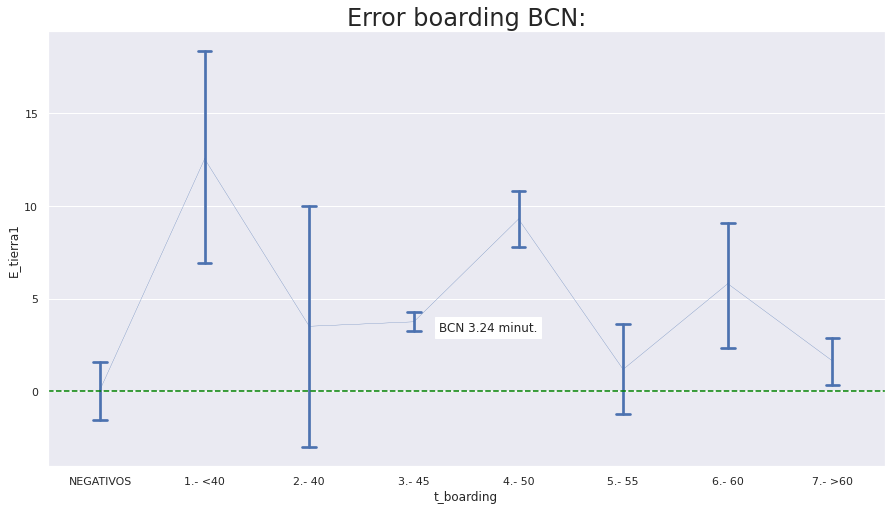

In [163]:
# Intervals de confiança per grup de boarding. Tipus avion --> temps assignat a terra)

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='t_boarding', y = "E_tierra1", data= df4BarcelonaTierra, scale=.1, kind = "point", capsize=0.13)

#ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error boarding BCN:', fontsize = 24)

# Guardar a EXCEL

In [164]:
# Borro las columnas que no me interesan.
guardar = 'No'

'''
borrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',
       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',
       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']
df3 = df3.drop(borrarColumnas, axis=1)
'''

"\nborrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',\n       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',\n       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']\ndf3 = df3.drop(borrarColumnas, axis=1)\n"

In [165]:
df3.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Setmana', 'DiaSetmana', 'DiaSetmanaName',
       'Aeropuerto_Key', 'AeropuertoKey1', 't_ClosePax', 't_Close_Cargo_Door',
       't_Entre_Puertas', 'Retardo_Abrir_Puerta_Pax', 'Trayecto', 'E_Despegue',
       'lag_STD', 'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX',
       'lag_Secuencia', 'lag_REG', 'T_teoricoTierra1', 'T_RealTierra1',
       'E_tierra1', 'Puntualidad1', 'Total_PAX_Boarding', 'T_Medio_Boarding',
       'Taxi_Despegue', 'Taxi_Aterrizaje', 'DuracionVueloTeorico',
       'DuracionVueloReal', 'E_Duracion_V

In [166]:
df3.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Setmana', 'DiaSetmana', 'DiaSetmanaName',
       'Aeropuerto_Key', 'AeropuertoKey1', 't_ClosePax', 't_Close_Cargo_Door',
       't_Entre_Puertas', 'Retardo_Abrir_Puerta_Pax', 'Trayecto', 'E_Despegue',
       'lag_STD', 'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX',
       'lag_Secuencia', 'lag_REG', 'T_teoricoTierra1', 'T_RealTierra1',
       'E_tierra1', 'Puntualidad1', 'Total_PAX_Boarding', 'T_Medio_Boarding',
       'Taxi_Despegue', 'Taxi_Aterrizaje', 'DuracionVueloTeorico',
       'DuracionVueloReal', 'E_Duracion_V

In [167]:
# Guardar excel
if guardar != 'No':
  nombreFichero = "D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_JMML_" + Hoja + ".xlsx"

  df3.to_excel(nombreFichero)
  print()
  print('Guardado fichero : ', nombreFichero)
  print()
else:
  print('No guardado')

No guardado


In [168]:
# Pruebo esta manera de guardar el fichero EXCEL en DRIVE
# Cuidado que la hora no coincide con la del ordenador

if guardar != 'Si':

  #Save only the first secuence.
  from datetime import datetime
  fecha=datetime.now()

  dfRegistros1= (df3['Secuencia']== 1) 

  df7 = df3[dfRegistros1]

  path = '/content/drive/MyDrive/Ficheros de Vueling' + '/' + str(fecha) +' '+ Hoja + ".xlsx"
  #df5.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_Vuelo_" + Hoja + ".xlsx")

  df7.to_excel(path)
  print()
  print('Guardado fichero :' , path)
  print()
  print()
else:
  print('No guardado')


Guardado fichero : /content/drive/MyDrive/Ficheros de Vueling/2022-10-10 08:27:05.412716 FLT_2022.xlsx




In [169]:
#df7.columns()

In [170]:
print('forma ',df3.shape)


forma  (11769, 92)


# Calcul temps en vuelo 1

In [171]:
df.columns
#print(df['Close Pax Door'])

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Setmana', 'DiaSetmana', 'DiaSetmanaName',
       'Aeropuerto_Key', 'AeropuertoKey1', 't_ClosePax', 't_Close_Cargo_Door',
       't_Entre_Puertas', 'Retardo_Abrir_Puerta_Pax', 'Trayecto', 'E_Despegue',
       'lag_STD', 'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX',
       'lag_Secuencia', 'lag_REG', 'T_teoricoTierra1', 'T_RealTierra1',
       'E_tierra1', 'Puntualidad1', 'Total_PAX_Boarding', 'T_Medio_Boarding',
       'Taxi_Despegue', 'Taxi_Aterrizaje', 'DuracionVueloTeorico',
       'DuracionVueloReal', 'E_Duracion_V

In [172]:
# Calculo tiempo de vuelo teorico Real y error
df['DuracionVueloTeorico']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'] = (df['DuracionVueloReal'] - df['DuracionVueloTeorico']) #/  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'].head(3)

media = round(df['E_Duracion_Vuelo'].mean(),2)

print('\n\nError medio en tiempo de vuelo',media)



Error medio en tiempo de vuelo -5.51


# Estudio de la duracion del vuelo

In [173]:
# Identifico los Aeropuertos principales.


path =(r"/content/drive/MyDrive/Vueling_Trayectos_Duracion_Vuelo.xlsx")
 
#df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')

#path =(r"D:\Documentos D\02.- Datos Vueling\Vueling_Trayectos_Duracion_Vuelo.xlsx")


df_Trayectos = pd.read_excel(path, sheet_name='Trayectos')
df_Trayectos = df_Trayectos.drop(['Borrar'], axis=1)
df_Trayectos.head(6)

,Trayecto,grupoTrayecto
0,BCN-PMI,BCN-PMI
1,BCN-SVQ,BCN-SVQ
2,BCN-ORY,BCN-ORY
3,BCN-IBZ,BCN-IBZ
4,BCN-BIO,BCN-BIO
5,AGP-BCN,AGP-BCN


Creo la variable trayecte para identificar que trayectes tinc. Com un avió va de DEp (departure) a ARR (arival), per identificr les trayectories me es igual els trayectes DEP a ARR que si va de ARR a DEp. Vull dir per example
de BCN a MAD es la mateixa distancai que des de MAD a BCN.

aquesta nova variable li diré 

## Calcul quantitat de trajectes

In [174]:
def trajecte(df):
    
    if ( df['DEP']<df['ARR']):
        return (df['DEP'] +' - '+ df['ARR'])
    elif (df['DEP']>df['ARR']):
        return (df['ARR'] +' - '+ df['DEP'])

df['Trajecto'] = df.apply(trajecte, axis = 1)
df[['DEP','ARR','Trayecto']].head(-3)
df77=df[['DEP','ARR','Trayecto']]
df77.head()

,DEP,ARR,Trayecto
0,BIO,SVQ,BIO-SVQ
1,SVQ,BIO,BIO-SVQ
2,BIO,SCQ,BIO-SCQ
3,SCQ,BIO,BIO-SCQ
4,BIO,TFN,BIO-TFN


In [175]:
# Sapigue quants vols hi ha en cada trajecte.
TrajectesCantitat= df['Trajecto'] 
TrajectesCantitat['Trajecto']= df['Trajecto']
#TrajectesCantitat.set_axis(['Trajete'], axis=1)
TrajectesCantitat['Cantidad'] = df['Trayecto'].value_counts().to_frame() #.index.tolist()
#TrajectesCantitat.columns=['Trajecte','Cantitat']

#TrajectesCantitat=pd.DataFrame(TrajectesCantitat)
#TrajectesCantitat=.reset_index()
'''
AeropuertosCantidad['cantitat'].sort_values
AeropuertosCantidad=AeropuertosCantidad.sample(n=6, replace=True)
AeropuertosCantidad.columns=['Aeroport', 'cantitat']
AeropuertosCantidad.shape
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


"\nAeropuertosCantidad['cantitat'].sort_values\nAeropuertosCantidad=AeropuertosCantidad.sample(n=6, replace=True)\nAeropuertosCantidad.columns=['Aeroport', 'cantitat']\nAeropuertosCantidad.shape\n"

Python Pandas Value_counts() tricks that make your work more efficient

https://re-thought.com/pandas-value_counts/


---




In [176]:
df8=df[['STA','STD', 'ATD', 'ATA', 'Trajecto', 'DuracionVueloTeorico']]
df8['E_t_vuelo']= (-(df8['STA']-df8['STD']) +(df8['ATA']-df8['ATD']))/  np.timedelta64(1, 'm') 
#df8['Cantidadd'] = df8['Trajecto'].value_counts() # Dentro del parenteisis normalize=True da el porcentaje

df8[:13]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STA,STD,ATD,ATA,Trajecto,DuracionVueloTeorico,E_t_vuelo
0,2022-01-01 09:05:00,2022-01-01 07:40:00,2022-01-01 08:00:00,2022-01-01 09:20:00,BIO - SVQ,85.0,-5.0
1,2022-01-01 11:05:00,2022-01-01 09:40:00,2022-01-01 09:51:00,2022-01-01 11:09:00,BIO - SVQ,85.0,-7.0
2,2022-01-01 12:50:00,2022-01-01 11:40:00,2022-01-01 11:40:00,2022-01-01 12:45:00,BIO - SCQ,70.0,-5.0
3,2022-01-01 14:35:00,2022-01-01 13:30:00,2022-01-01 13:23:00,2022-01-01 14:11:00,BIO - SCQ,65.0,-17.0
4,2022-01-01 18:20:00,2022-01-01 15:15:00,2022-01-01 15:07:00,2022-01-01 18:14:00,BIO - TFN,185.0,2.0
5,2022-01-01 22:00:00,2022-01-01 18:55:00,2022-01-01 18:51:00,2022-01-01 21:58:00,BIO - TFN,185.0,2.0
6,2022-01-01 09:00:00,2022-01-01 07:30:00,2022-01-01 07:12:00,2022-01-01 08:38:00,PMI - SVQ,90.0,-4.0
7,2022-01-01 11:15:00,2022-01-01 09:40:00,2022-01-01 09:23:00,2022-01-01 10:54:00,PMI - SVQ,95.0,-4.0
8,2022-01-01 13:50:00,2022-01-01 11:50:00,2022-01-01 11:39:00,2022-01-01 13:45:00,FUE - SVQ,120.0,6.0
9,2022-01-01 16:35:00,2022-01-01 14:25:00,2022-01-01 14:14:00,2022-01-01 16:27:00,FUE - SVQ,130.0,3.0


In [177]:
TrajectesCantitat = df8['Trajecto'].value_counts().to_frame() #.index.tolist()
TrajectesCantitat.reset_index(level=0, inplace=True)
TrajectesCantitat.columns=['Trajecto', 'Vegadas']
TrajectesCantitat = TrajectesCantitat[:13] 

In [178]:
# Selecionamos los 3 trajectes més repetitis:

#Unim les dos bases de dades

ff= pd.merge(df8, TrajectesCantitat)
ff

,STA,STD,ATD,ATA,Trajecto,DuracionVueloTeorico,E_t_vuelo,Vegadas
0,2022-01-01 15:55:00,2022-01-01 14:20:00,2022-01-01 14:27:00,2022-01-01 15:58:00,AGP - BCN,95.0,-4.0,1268
1,2022-01-01 18:10:00,2022-01-01 16:35:00,2022-01-01 16:40:00,2022-01-01 18:16:00,AGP - BCN,95.0,1.0,1268
2,2022-01-01 07:00:00,2022-01-01 05:25:00,2022-01-01 05:20:00,2022-01-01 06:46:00,AGP - BCN,95.0,-9.0,1268
3,2022-01-01 09:15:00,2022-01-01 07:40:00,2022-01-01 07:40:00,2022-01-01 09:12:00,AGP - BCN,95.0,-3.0,1268
4,2022-01-01 09:45:00,2022-01-01 08:10:00,2022-01-01 08:09:00,2022-01-01 09:34:00,AGP - BCN,95.0,-10.0,1268
...,...,...,...,...,...,...,...,...
16342,2022-05-16 09:15:00,2022-05-16 06:00:00,2022-05-16 05:49:00,2022-05-16 08:58:00,BCN - LPA,195.0,-6.0,902
16343,2022-05-16 13:35:00,2022-05-16 10:05:00,2022-05-16 10:03:00,2022-05-16 13:29:00,BCN - LPA,210.0,-4.0,902
16344,2022-05-16 18:05:00,2022-05-16 14:50:00,2022-05-16 14:42:00,2022-05-16 17:47:00,BCN - LPA,195.0,-10.0,902
16345,2022-05-16 08:20:00,2022-05-16 04:50:00,2022-05-16 04:50:00,2022-05-16 08:16:00,BCN - LPA,210.0,-4.0,902


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))




Mitjana Error en els vols de tots els trajectes:  -5.51
Mitjana Error en els vols dels principals trajectes:  -4.42


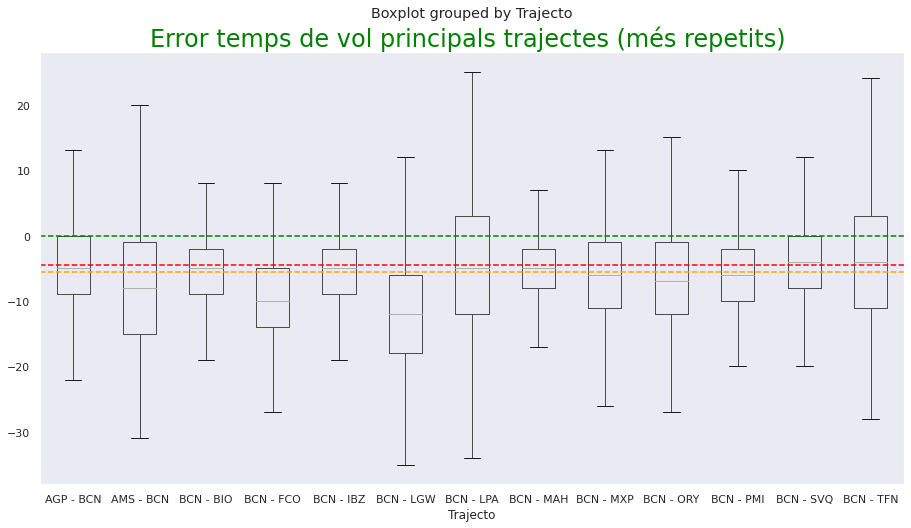

In [179]:
ax=ff.boxplot(by ='Trajecto', column =['E_t_vuelo'], grid = False, showfliers = False)
ax.axhline(0, color="green", linestyle = '--')
mitjana=round(ff['E_t_vuelo'].mean(),2)
mitjanaTotal=round(df8['E_t_vuelo'].mean(),2)
ax.axhline(mitjana, color="red", linestyle = '--')
ax.axhline(mitjanaTotal, color="orange", linestyle = '--')
ax.set_title('Error temps de vol principals trajectes (més repetits) ', fontsize = 24, color= 'green')

print('\n\nMitjana Error en els vols de tots els trajectes: ', mitjanaTotal )
print('Mitjana Error en els vols dels principals trajectes: ', mitjana )

In [180]:
df8.head()

,STA,STD,ATD,ATA,Trajecto,DuracionVueloTeorico,E_t_vuelo
0,2022-01-01 09:05:00,2022-01-01 07:40:00,2022-01-01 08:00:00,2022-01-01 09:20:00,BIO - SVQ,85.0,-5.0
1,2022-01-01 11:05:00,2022-01-01 09:40:00,2022-01-01 09:51:00,2022-01-01 11:09:00,BIO - SVQ,85.0,-7.0
2,2022-01-01 12:50:00,2022-01-01 11:40:00,2022-01-01 11:40:00,2022-01-01 12:45:00,BIO - SCQ,70.0,-5.0
3,2022-01-01 14:35:00,2022-01-01 13:30:00,2022-01-01 13:23:00,2022-01-01 14:11:00,BIO - SCQ,65.0,-17.0
4,2022-01-01 18:20:00,2022-01-01 15:15:00,2022-01-01 15:07:00,2022-01-01 18:14:00,BIO - TFN,185.0,2.0


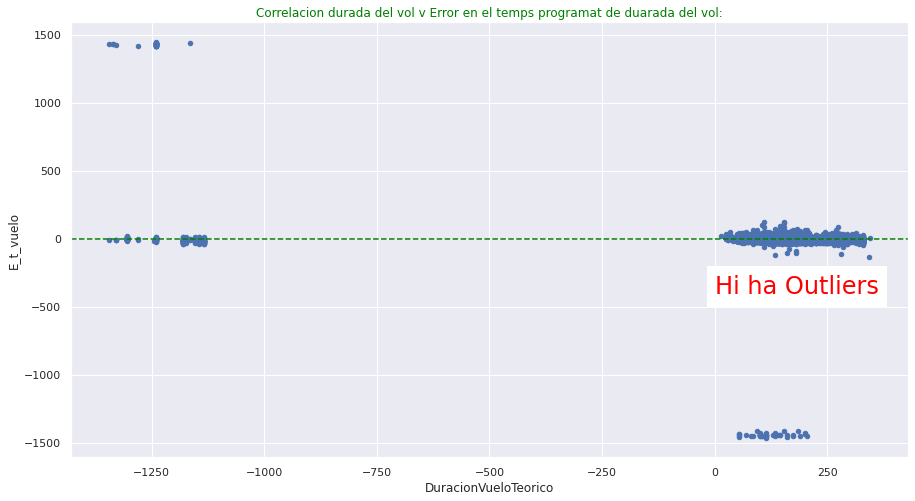

In [181]:
 
ax=df8.plot.scatter( x = 'DuracionVueloTeorico', y = 'E_t_vuelo')
ax.set_title('Correlacion durada del vol v Error en el temps programat de duarada del vol:', fontsize = 12, color= 'green')
textoBCN = "Media "+ str(media) + ' minut.'
ax.text(0  ,-400, 'Hi ha Outliers', backgroundcolor='w', fontsize = 24, color= 'red') 
ax.axhline(0, color="green", linestyle = '--')

Text(0.5, 1.0, 'Correlacion durada del vol v Error en el temps programat de duarada del vol:')

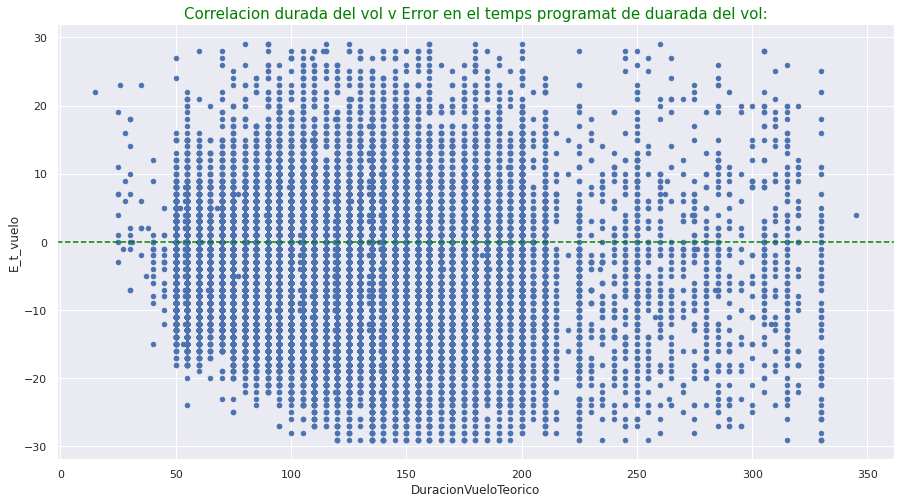

In [182]:
#@title Existeix correlació entre Error del temps de vol v Duració del Vol?

dfEliminarOutliers= (df8['E_t_vuelo']< 30) & (df8['E_t_vuelo']> -30 ) & (df8['DuracionVueloTeorico']> 0 )

df8_a = round(df8[dfEliminarOutliers],2) 
ax= df8_a.plot.scatter( x = 'DuracionVueloTeorico', y = 'E_t_vuelo') #, hue= 'Trajecto')
ax.axhline(0, color="green", linestyle = '--')
ax.set_title('Correlacion durada del vol v Error en el temps programat de duarada del vol:', fontsize = 15, color= 'green')

Es veu clar que no hi ha correlació entre la durada del vol i l'error en l'arribada. Això vol dir que els pilots tenen poc marge de maniobra

In [183]:
coefVuelo=round(df8['DuracionVueloTeorico'].corr(df8['E_t_vuelo']),3)
print('Valor de correlació :', coefVuelo)

Valor de correlació : -0.229


El coeficient de correlació molt baix. Atès que aquesta correlació és negativa, ens diu que els punts i les assistències estan correlacionats negativament.



---



In [184]:
TrajectesCantitat= pd.DataFrame(TrajectesCantitat)
TrajectesCantitat[:3]

,Trajecto,Vegadas
0,BCN - PMI,2243
1,BCN - SVQ,1527
2,BCN - ORY,1517


In [185]:
TrajectesCantitat.reset_index()
#TrajectesCantitat.columns=['Trajecto', 'Cantidad','Proporcio']
TrajectesCantitat

,Trajecto,Vegadas
0,BCN - PMI,2243
1,BCN - SVQ,1527
2,BCN - ORY,1517
3,BCN - IBZ,1421
4,BCN - BIO,1328
5,AGP - BCN,1268
6,BCN - MAH,1200
7,AMS - BCN,1137
8,BCN - FCO,1038
9,BCN - LGW,959


In [186]:
TrajectesCantitat.head(2)

,Trajecto,Vegadas
0,BCN - PMI,2243
1,BCN - SVQ,1527


In [187]:
TrajectesCantitat= df['Trajecto']
TrajectesCantitat['cantitat'] = df['Trajecto'].value_counts()
TrajectesCantitat.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(56134,)

In [188]:
 

df7=df
#df7.merge(TrajectesCantitat, how='Trajecto')
df7=df[df['Trajecto'].isin(TrajectesCantitat)]
df7[:3]

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Aeropuerto_Key3,Aeropuerto_Key4,Puntualidad2,Puntualidad3,Puntualidad4,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,Trajecto
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,BIO,SCQ,4.0,-5.0,-24.0,24.0,-34.0,6.0,-4.0,BIO - SVQ
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,SCQ,BIO,-5.0,-24.0,-6.0,-4.0,-27.0,12.0,-19.0,BIO - SVQ
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,BIO,TFN,-24.0,-6.0,-2.0,-19.0,-18.0,0.0,-37.0,BIO - SCQ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Error mitjà de vol:  -5.511161390319075  minuts

Media filtrada =  -5.34 minutos


Text(-5.34, 5.34, 'Media -5.51 minut.')

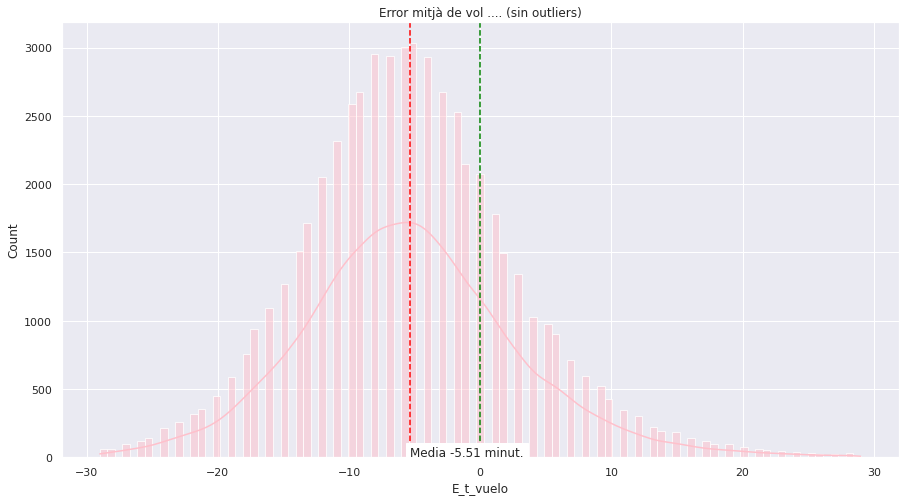

In [189]:
#@title  Error en el temps de vol:

df8=df[['STA','STD', 'ATD', 'ATA', 'Trajecto','DiaSetmana','MES','DiaSetmanaName' ]]
df8['E_t_vuelo']= (-(df8['STA']-df8['STD']) +(df8['ATA']-df8['ATD']))/  np.timedelta64(1, 'm') 

ErrorMedioVuelo= df8['E_t_vuelo'].mean()
print('Error mitjà de vol: ', ErrorMedioVuelo, ' minuts')

dfEliminarOutliers= (df8['E_t_vuelo']< 30) & (df8['E_t_vuelo']> -30)
df8 = round(df8[dfEliminarOutliers],2)

df8['E_t_vuelo']
ax = sns.histplot(data= df8.E_t_vuelo, kde= True, color ='pink')
ax.set_title("Error mitjà de vol .... (sin outliers)")
print()
print('Media filtrada = ', round(df8['E_t_vuelo'].mean(),2), 'minutos')

media = round(df8['E_t_vuelo'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


#textoBCN = "Media "+ str(media) + ' minuts'
ax.text(media  ,-media, textoBCN, backgroundcolor='w')

In [190]:
# Agrupo per Trayecte

df5 = df

df5 = pd.merge(df5, df_Trayectos, left_on='Trayecto', right_on='Trayecto')


df5 = df5.sort_values(['DATE', 'REG', 'STD'])
df5 = df5.reset_index(drop=True) 
df5.head(3)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Aeropuerto_Key4,Puntualidad2,Puntualidad3,Puntualidad4,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,Trajecto,grupoTrayecto
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,SCQ,4.0,-5.0,-24.0,24.0,-34.0,6.0,-4.0,BIO - SVQ,otro
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,BIO,-5.0,-24.0,-6.0,-4.0,-27.0,12.0,-19.0,BIO - SVQ,otro
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,TFN,-24.0,-6.0,-2.0,-19.0,-18.0,0.0,-37.0,BIO - SCQ,otro


In [191]:
guardar = 'No'
# Guardar excel
if guardar != 'No':
  #Save only the first secuence.
  from datetime import datetime
  fecha=datetime.now()

  dfRegistros1= (df5['Secuencia']== 1) 

  df5 = df5[dfRegistros1]

  path = '/content/drive/MyDrive/Ficheros de Vueling' + '/' + str(fecha) +' '+ Hoja + ".xlsx"
  #df5.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_Vuelo_" + Hoja + ".xlsx")

  df5.to_excel(path)
  print()
  print('Guardado fichero :' , path)
  print()

/content/drive/MyDrive/Ficheros de Vueling

# Estudio de los tiempos de TAXI


In [192]:
df[['Taxi_Despegue', 'Taxi_Aterrizaje']]

,Taxi_Despegue,Taxi_Aterrizaje
0,10.0,3.0
1,12.0,2.0
2,10.0,5.0
3,7.0,3.0
4,16.0,7.0
...,...,...
56128,10.0,4.0
56129,24.0,5.0
56130,7.0,4.0
56131,24.0,7.0



Media =  13.85 minutos


Text(0.5, 1.0, 'Tiempo de Radadura Takeoff')

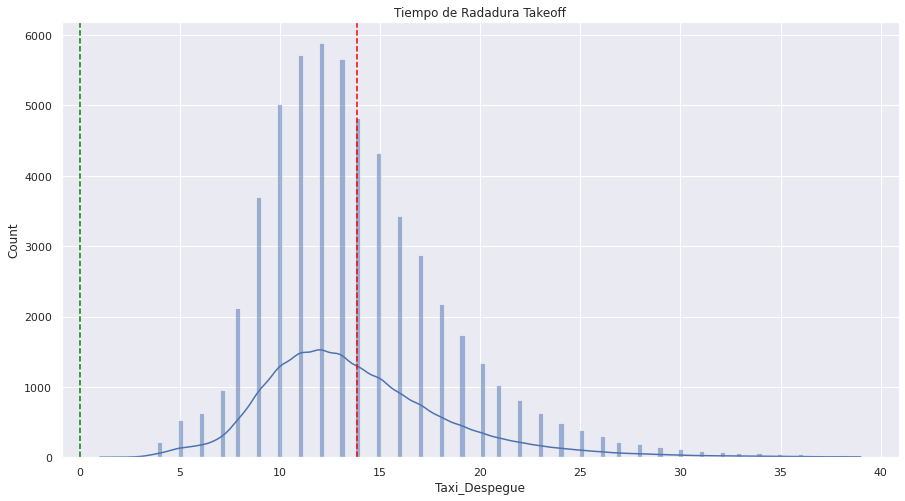

In [193]:
#@title Taxi Enlairament:
dfEliminarOutliers= ((df['Taxi_Despegue'] <40) & (df['Taxi_Despegue'] >0))

df3 = df[dfEliminarOutliers]

ax = sns.histplot(data= df3.Taxi_Despegue, kde= True)
print()
print('Media = ', round(df3['Taxi_Despegue'].mean(),2), 'minutos')

media = round(df3['Taxi_Despegue'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Tiempo de Radadura Takeoff')


Media =  5.5 minutos


Text(0.5, 1.0, 'Tiempo de rodadura Landing')

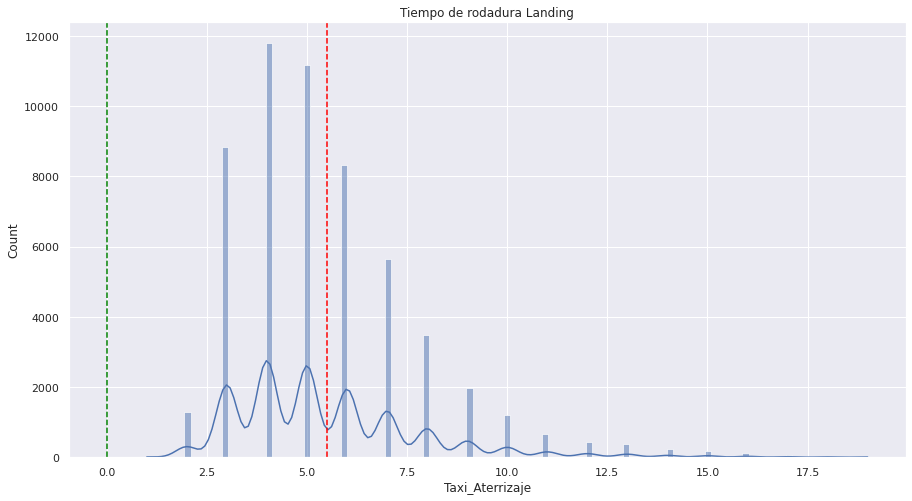

In [194]:
#@title Taxi Aterrizaje
dfEliminarOutliers= ((df['Taxi_Aterrizaje'] <20) & (df['Taxi_Aterrizaje'] >0))

df3 = df[dfEliminarOutliers] 

ax = sns.histplot(data= df3.Taxi_Aterrizaje, kde= True)
print()
print('Media = ', round(df3['Taxi_Aterrizaje'].mean(),2), 'minutos')

media = round(df3['Taxi_Aterrizaje'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Tiempo de rodadura Landing')

In [195]:
#@title Estudio la cantidad de tiempo que tardamos en vaciar y llenar un avion.

dfEliminarOutliers= ((df['REG'] == df['lag_REG']))

df3 = df[dfEliminarOutliers] 
df3['Total_Pasajeros_Boarding']= df3['ACT PAX'] +df3['lag_ACT PAX']

df3['t_Boarding_X_Pasajero'] = round((df3['Total_Pasajeros_Boarding']/ df3['T_RealTierra1']),2)

df3[4:10][['REG', 
           'lag_REG',
           'Total_Pasajeros_Boarding', 
           'ACT PAX', 'lag_ACT PAX',
           't_Boarding_X_Pasajero', 
           'T_Medio_Boarding']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,REG,lag_REG,Total_Pasajeros_Boarding,ACT PAX,lag_ACT PAX,t_Boarding_X_Pasajero,T_Medio_Boarding
4,EC-JSY,EC-JSY,276.0,155.0,121.0,7.46,7.5
6,EC-JZI,EC-JZI,175.0,57.0,118.0,3.89,3.9
7,EC-JZI,EC-JZI,241.0,118.0,123.0,5.36,5.4
8,EC-JZI,EC-JZI,123.0,123.0,0.0,4.24,4.2
9,EC-JZI,EC-JZI,125.0,0.0,125.0,3.05,3.0
10,EC-JZI,EC-JZI,219.0,125.0,94.0,6.44,6.4



Media =  5.56 minutos


Text(0.5, 1.0, 'Cuantos pasajeros descargamos en un minuto')

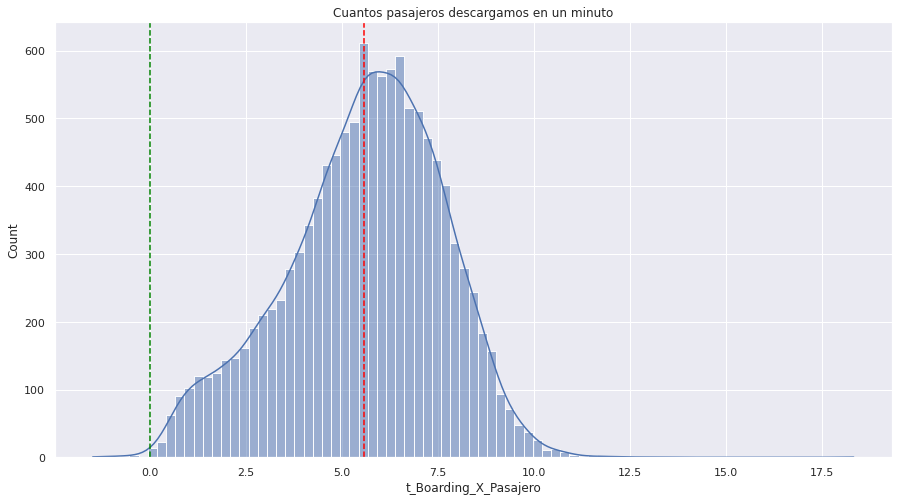

In [196]:
#@title Taxi Aterratje.
dfEliminarOutliers= ((df3['t_Boarding_X_Pasajero'] <20) & 
                     (df3['t_Boarding_X_Pasajero'] >-10) & 
                     (df3['Secuencia'] ==1))

df3 = df3[dfEliminarOutliers] 
variableHistograma = 't_Boarding_X_Pasajero'
ax = sns.histplot(data= df3.t_Boarding_X_Pasajero, kde= True)
print()
print('Media = ', round(df3[variableHistograma].mean(),2), 'minutos')

media = round(df3[variableHistograma].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Cuantos pasajeros descargamos en un minuto')

Text(0.5, 1.0, 'Quants passatgers descarreguem en un minut per Aeroport:')

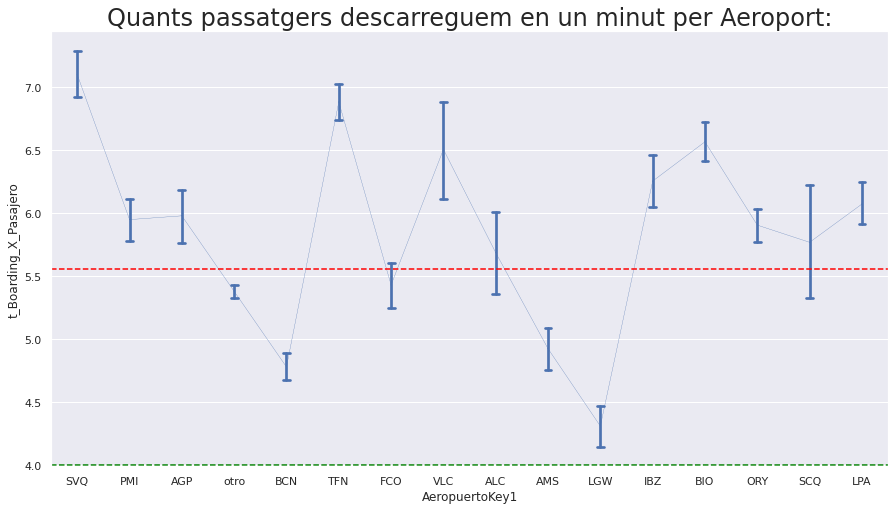

In [197]:
#@title Intervalos de Confianza por aeropuerto
sns.set_theme(style="darkgrid")
 
sns.set(rc = {'figure.figsize':(15,8)})  

# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = 't_Boarding_X_Pasajero', data= df3, scale=.1, kind = "point", capsize=0.13)

ax.axhline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(4, color="green", linestyle = '--')


#textoBCN = "BCN "+ str(puntualidadBCN) + ' minut.'
#ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Quants passatgers descarreguem en un minut per Aeroport:', fontsize = 24)

In [198]:
df3['Secuencia']

0        1.0
6        1.0
12       1.0
16       1.0
21       1.0
        ... 
56105    1.0
56108    1.0
56115    1.0
56121    1.0
56127    1.0
Name: Secuencia, Length: 11870, dtype: float64

# Estudio del SLOT

In [199]:
#@title Càlcul el temps que hi ha de diferent entre SLOT v STD
df3= df.copy()
dfEliminarOutliers= ((df3['E_Despegue'] >20) &(df3['DEP'] =='BCN'))

df3 = df3[dfEliminarOutliers] 


#df3['E_SLOT']= df3['SLOT']-df3['STD']
df3[[ 'SLOT', 'STD', 'ATD', 'E_Despegue', 'DEP']]

,SLOT,STD,ATD,E_Despegue,DEP
91,,2022-01-01 19:05:00,2022-01-01 20:33:00,88.0,BCN
94,,2022-01-01 15:25:00,2022-01-01 15:47:00,22.0,BCN
106,,2022-01-01 17:30:00,2022-01-01 19:48:00,138.0,BCN
178,06:46:00,2022-01-01 06:00:00,2022-01-01 06:31:00,31.0,BCN
219,,2022-01-01 17:55:00,2022-01-01 18:23:00,28.0,BCN
...,...,...,...,...,...
55720,,2022-05-16 18:30:00,2022-05-16 18:59:00,29.0,BCN
55722,,2022-05-16 05:10:00,2022-05-16 05:42:00,32.0,BCN
55850,16:50:00,2022-05-16 16:00:00,2022-05-16 16:39:00,39.0,BCN
56073,09:22:00,2022-05-16 08:05:00,2022-05-16 09:13:00,68.0,BCN


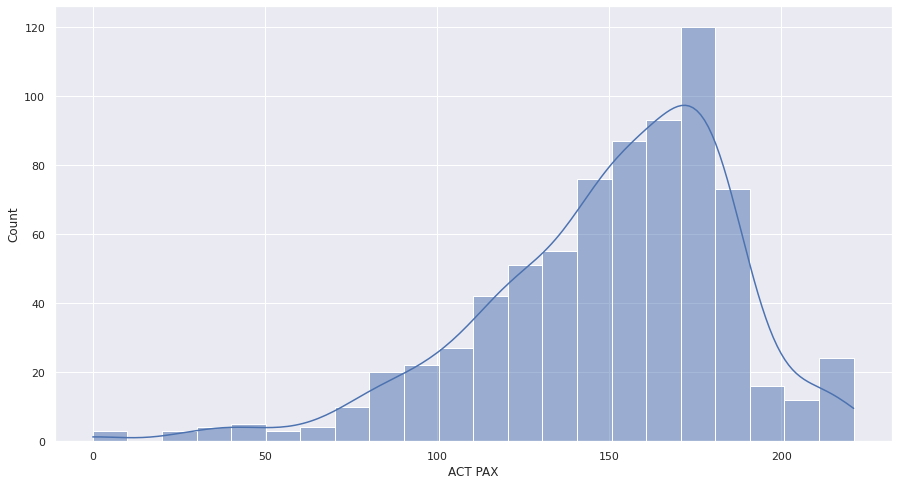

In [200]:
#@title Quantitat de passatgers que transporta

ax = sns.histplot(data= df3['ACT PAX'], kde= True)

In [201]:
#@title Estudi temps des des de que aterra fins que s'obre la porta càrrec i PAX
df3=df.copy()

df3['retardoOperturaPuertaAterrizaje']=(df['Open Cargo/Pax Door']-df['ATA'])  /  np.timedelta64(1, 'm') 
df3[['retardoOperturaPuertaAterrizaje','Open Cargo/Pax Door', 'ATA']]

,retardoOperturaPuertaAterrizaje,Open Cargo/Pax Door,ATA
0,3.0,2022-01-01 09:23:00,2022-01-01 09:20:00
1,2.0,2022-01-01 11:11:00,2022-01-01 11:09:00
2,1.0,2022-01-01 12:46:00,2022-01-01 12:45:00
3,1.0,2022-01-01 14:12:00,2022-01-01 14:11:00
4,0.0,2022-01-01 18:14:00,2022-01-01 18:14:00
...,...,...,...
56128,476.0,2022-05-16 15:33:00,2022-05-16 07:37:00
56129,479.0,2022-05-16 18:01:00,2022-05-16 10:02:00
56130,516.0,2022-05-16 20:31:00,2022-05-16 11:55:00
56131,-404.0,2022-05-16 09:34:00,2022-05-16 16:18:00


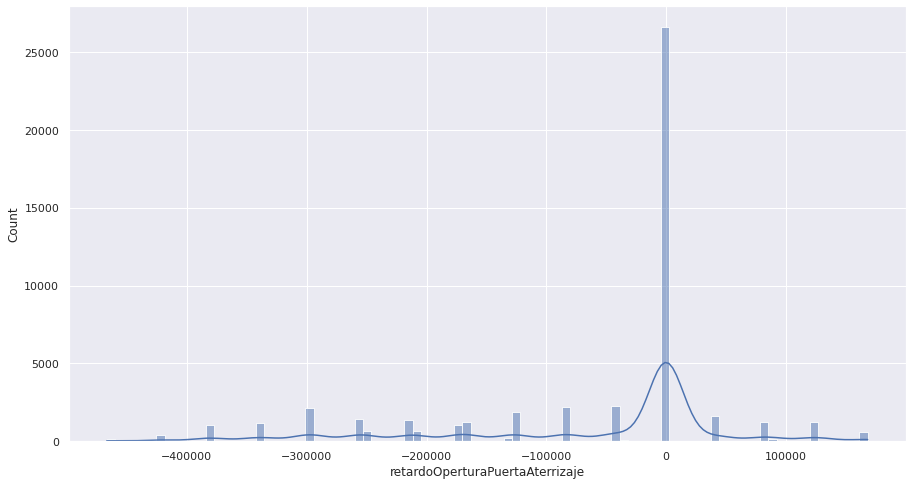

In [202]:
ax = sns.histplot(data= df3.retardoOperturaPuertaAterrizaje, kde= True)

# Correlaciones Error temps de Vol v mes dia setmana

Documentación:      Building structured multi-plot grids


https://seaborn.pydata.org/tutorial/axis_grids.html



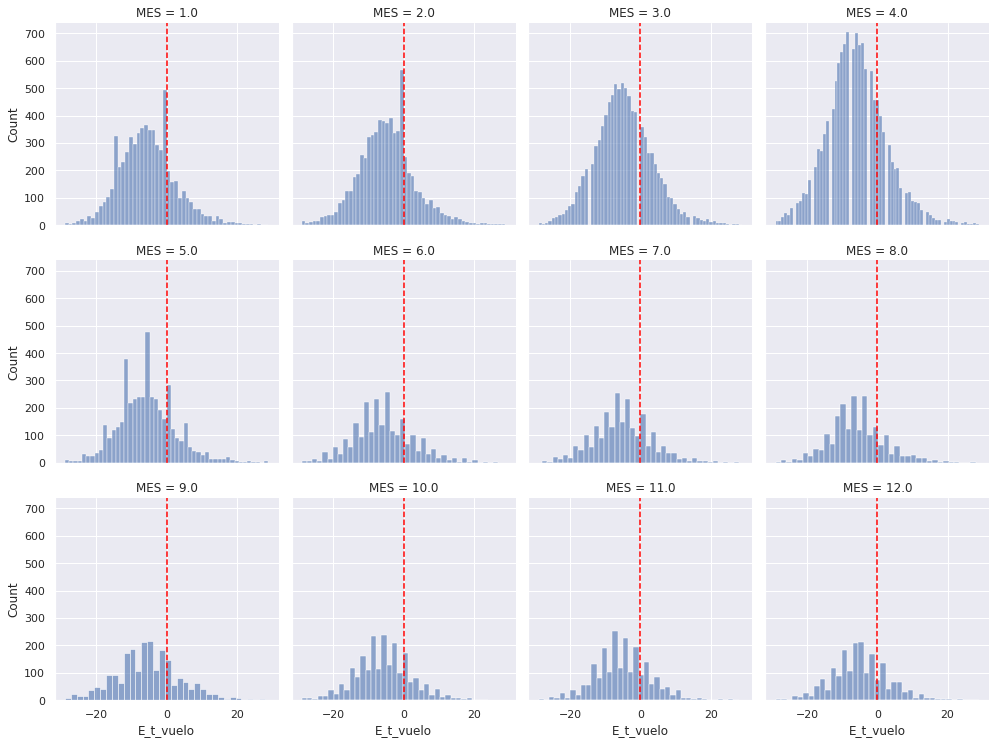

In [203]:
#@title histogramas retards per mesos

g = sns.FacetGrid(df8, col="MES", height=3.5, col_wrap=4)
g.map(sns.histplot, "E_t_vuelo", alpha=0.6) # kde=False, fit=norm)
g.refline(x=0, color='red') #[, x, y, color, linestyle])

No se ve un claro y evidente diferencia entre los meses, por lo que consideraremos el comportamiento en los retrasos estable.

-31.9 31.9


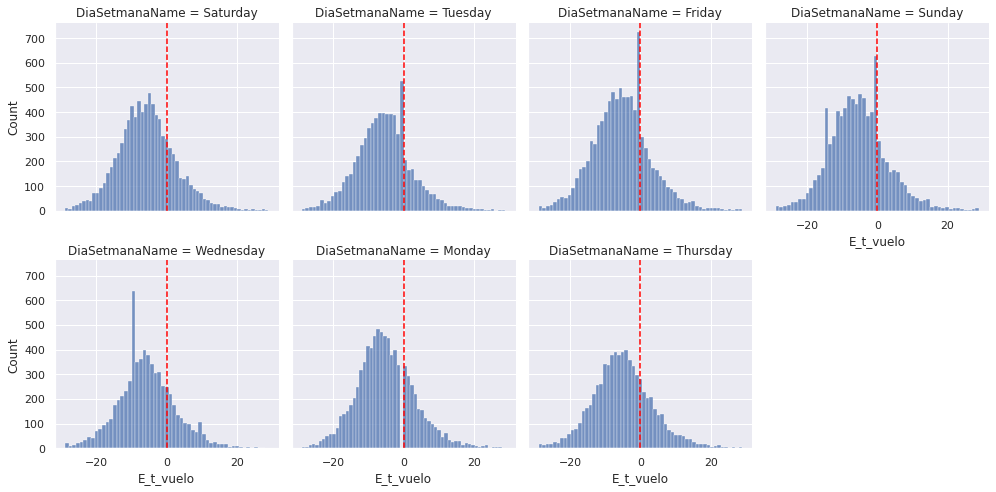

In [204]:
#@title Correlacion dia de la setmana v mes en el Error del vol

g = sns.FacetGrid(df8, col="DiaSetmanaName", col_wrap=4, height=3.5) #, row='MES')
g.map(sns.histplot, "E_t_vuelo")
g.refline(x=0, color='red') #[, x, y, color, linestyle])
xmin, xmax = plt.xlim()
print(xmin, xmax)

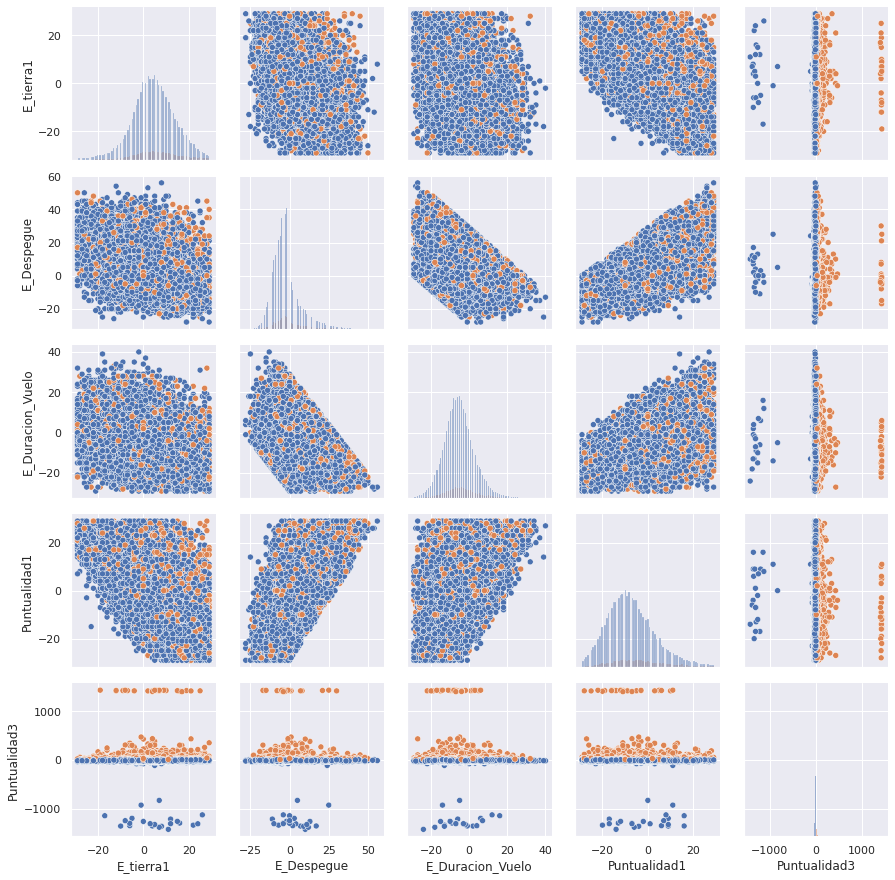

In [205]:
#@title Box plot Errores v secuencia
dfEliminarOutliers= ((df['E_tierra1']< 30) & (df['E_Despegue']> -30) & (df['E_tierra1']> -30) & (df['Puntualidad1']< 30) & (df['Puntualidad1']> -30)& (df['E_Duracion_Vuelo']> -30))

# Para crear una "logistic regresion":
# 10 minuts és el temps que s'accepta com arribar a l'hora

df['Tard1'] = np.where(df['Puntualidad1'] <10, 0, 1)
df['Tard2'] = np.where(df['Puntualidad2'] <10, 0, 1)
df['Tard3'] = np.where(df['Puntualidad3'] <10, 0, 1)



df9 = df[dfEliminarOutliers]

df9=df9[['E_tierra1','E_Despegue', 'E_Duracion_Vuelo', 'Puntualidad1','Tard3', 'Puntualidad3' ]]
#df8["tardp"] = df9["Tard3"].astype(str)


g = sns.PairGrid(df9, hue='Tard3')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot) 


In [206]:
df9

,E_tierra1,E_Despegue,E_Duracion_Vuelo,Puntualidad1,Tard3,Puntualidad3
0,-4.0,20.0,-5.0,15.0,0,-5.0
1,-4.0,11.0,-7.0,4.0,0,-24.0
2,-2.0,0.0,-5.0,-5.0,0,-6.0
3,16.0,-7.0,-17.0,-24.0,0,-2.0
4,2.0,-8.0,2.0,-6.0,0,-22.0
...,...,...,...,...,...,...
56125,-8.0,14.0,-2.0,12.0,0,-14.0
56126,6.0,4.0,-12.0,-8.0,0,-3.0
56127,21.0,-2.0,-12.0,-14.0,0,2.0
56128,3.0,7.0,-10.0,-3.0,0,-15.0



#**Conclusions:**

Hem vist en aquesta anàlisi de les dades, que els outliers afecten molt i donen molt de soroll. Hem acordat eliminar tots aquells que el seu error respecto al mateix temps que està establer siguin tots a 30 minuts, perquè considerem que 


un temps d'error superior vol dir per exemple que l'avió està avariat i, per tant, segur que en els altres salts provocarà retards.

L'impacta de l'aeroport es important per controlar la puntualitat. La raó es veu que en els aeroports més grans este que donar més temps per fer l'embarcament que en els aeroports més petits. Això també ho hem vist quan hem fem l'anàlisi en els trajectes. Si està involucrat un aeroport gran, llavors té impacte:

Mitjana Error en els vols de tots els trajectes:  -3.37 minuts
Mitjana Error en els vols dels principals trajectes amb aeroports grans:  -7.19 minuts.

Quan he calculat quants passatgers descarreguem en un minut per Aeroport, hem vist que l'aeroport de BCN té un rendiment molt petit comparat amb altres aeroports. Tenir un rendiment baix afecta la capacitat de controlar el temps que es requereix quan l'avió és a terra i això treu graus de llibertat en la puntualitat.

Una part curiosa ha sigut veure si existeix correlació entre Error del temps de vol v Duració del Vol. I la resposta és que no. Jo pensava que sí. La meva intuïció em deia que en els vols llargs els pilots són capaços de reduir el retard, però interpreto pels resultats obtinguts que no poden perquè estan en funció del que el controlador aeri els hi mana.

En l'ùltim gràfic veiem que per sapiguer si un avió tindrà retard amb la puntualitat del primer salt semble difil de trobar i aquesta serà la feina del seguent quadern:

3.c Companyia Aerea Algoritmes d’aprenentatge supervisat.ipynb

https://github.com/JMML2021/Entrega-projecte-final/blob/main/3.c%20Companyia%20Aerea%20Algoritmes%20d%E2%80%99aprenentatge%20supervisat.ipynb


També farem un quadern de benchmarking amb una altra companyia per veure si els resultats de puntualitat hi ha molta diferència.


Per descomptat es poden fer moltes més anàlisis, però l'objectiu d'aquest quadern és només veure com és el fitxer i fer una primera identificació de quin serà el comportament en la puntualitat del tercer salt.


In [207]:
print('\n\nTotal quantitat de registres: ',df.shape)
print('Total quantitat de registres sense outliers: ',df9.shape)

print('Porcentatje de registres rebutjas com outliers: ', round((1-df9.shape[0]/df.shape[0])*100,2), ' %')
print
print('Total quantitat de registres seqüencia 1: ',df3.shape)



Total quantitat de registres:  (56133, 95)
Total quantitat de registres sense outliers:  (50699, 6)
Porcentatje de registres rebutjas com outliers:  9.68  %
Total quantitat de registres seqüencia 1:  (56133, 93)



Media =  -6.9 minutos
Mediana =  -8.0 minutos


Text(0.5, 1.0, 'Puntualitat aribada 3r salt e minuts')

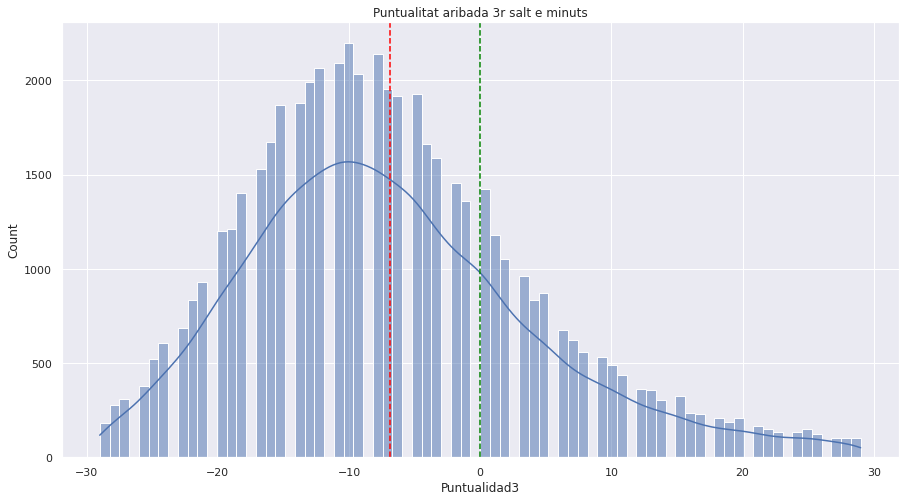

In [216]:
#@title Estudi Retard 3 salt:

dfEliminarOutliers= ((df['Puntualidad3']< 30) & (df['Puntualidad3']> -30) )
df9 = df[dfEliminarOutliers]
df9=df9[['E_tierra1','E_Despegue', 'E_Duracion_Vuelo', 'Puntualidad1','Tard3', 'Puntualidad3' ]]

ax = sns.histplot(data= df9['Puntualidad3'], kde= True)
print()
media = round(df9['Puntualidad3'].mean(),2)
mediana = round(df9['Puntualidad3'].median(),2)
print('Media = ', media, 'minutos')
print('Mediana = ', mediana, 'minutos')


ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Puntualitat aribada 3r salt e minuts')


In [209]:
#@title Subrutina para el calcul del Cp i el Cpk

def Cp(clave, usl, lsl):
    
    sigma = df9[clave].std()
   

    Cp = abs(round((usl - lsl) / (6*sigma),2))
    print('Valor del Cp= ', Cp) 
    return Cp

def Cpk(clave, usl, lsl):

    sigma = df9[clave].std()    
    m = round(np.mean(df9[clave]),2)
    print('mitjana ', m)

    Cpu = float(-usl + m) / (3*sigma)
    Cpl = float(-m + lsl) / (3*sigma)
    #print('Cpks ', Cpu, Cpl)
    Cpk = round( np.min([Cpu, Cpl]),2)
    print('Valor del Cpk= ', Cpk) 

    return Cpk

In [210]:
Cp('Puntualidad3', -30, 10)
Cpk('Puntualidad3', -30, 10)
print('\nSegond salt') 

Valor del Cp=  0.6
mitjana  -6.9
Valor del Cpk=  0.51

Segond salt


In [217]:
#@title calcul Cp i Cpk 3r salt en puntualitat d'arribada.

print('Total de vols treballat: ', len(df9))
vecesLlegaTarde=len(df9[df9['Puntualidad3']>10])
print('Quantitat de vegades que arriba tard en el tercer salt: ', vecesLlegaTarde)
print('Equival a: ',round((vecesLlegaTarde/len(df9)),2)*100,'%')

Total de vols treballat:  53106
Quantitat de vegades que arriba tard en el tercer salt:  4014
Equival a:  8.0 %


In [212]:
!pip install session_info
import session_info


session_info.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
